# Credit Card Fraud Detection

## Introduction
Credit card fraud is a wide-ranging term for theft and fraud committed using or involving a payment card, such as a credit card or debit card, as a fraudulent source of funds in a transaction. The purpose may be to obtain goods or services, or to make payment to another account which is controlled by a criminal. The Payment Card Industry Data Security Standard (PCI DSS) is the data security standard created to help businesses process card payments securely and reduce card fraud. Fraud prevention measures include the use of a credit card's security code, the cardholder's signature, the cardholder's billing address, and the card's issuing bank. More recently, big data and machine learning have been used to detect fraud.

## Problem Statement
The problem is to detect fraudulent credit card transactions using machine learning models. The dataset that we will be using for this problem is the Credit Card Fraud Detection dataset from Kaggle. The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## Data
The dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we do not have the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Evaluation
The evaluation metric for this problem is the F1 score. The F1 score is the harmonic mean of precision and recall. It is a good way to show that a classifer has a good value for both recall and precision. The F1 score is the best metric to use if you want to seek a balance between Precision and Recall.

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

We're going to use scikit-learn for machine learning modelling and evaluation.

We're going to use seaborn for data visualization.

Let's import all the tools we need.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Now we can import the dataset and start exploring it.

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This dataset contains 31 columns and 284,807 rows. The columns are all numerical and the only columns that are not transformed with PCA are 'Time' and 'Amount'. The 'Class' column is the target column and it takes value 1 in case of fraud and 0 otherwise, as mentioned earlier.
Good to mention that 'Time' has no meaning in this dataset, it's just a temporal reference of when the given transaction was performed ,so we can drop it.

In [5]:
time = data['Time']
amount = data['Amount']
fraud = data['Class']

features = list(data.columns[1:])
print("Number of features: ", len(features))
print("Features: ", features)

data = data[features]
label_column = features.pop()

print("Number of features after removing label column: ", len(features))
print("Label column: ", label_column) # Value between 0 and 1 (0: non-fraud, 1: fraud)


Number of features:  30
Features:  ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Number of features after removing label column:  29
Label column:  Class


# Exploratory Data Analysis (EDA)
Let's start by exploring the dataset and see what we can find.

## Data Preparation
Let's start by preparing the data for modelling. We will start by splitting the data into features and target.


In [6]:
X = data[features]
Y = data[label_column]

m = len(X)
n = len(X.columns)

print("Number of samples: ", m)
print("Number of features: ", n)

Number of samples:  284807
Number of features:  29


## Data Balancing

The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. This is a problem because most machine learning models are designed to maximize overall accuracy, which especially for imbalanced datasets, this can be misleading. For example, if we have 100 transactions and 99 are not fraud and 1 is fraud, a model that simply predicts that all transactions are not fraud will achieve 99% accuracy, even though it has a 100% false negative rate. This is why we need to balance the data. To demonstrate this, let's plot the target column.

Number of fraud samples:  492
Number of non-fraud samples:  284315
Percentage of fraud samples:  0.173 %
Percentage of non-fraud samples:  99.827 %


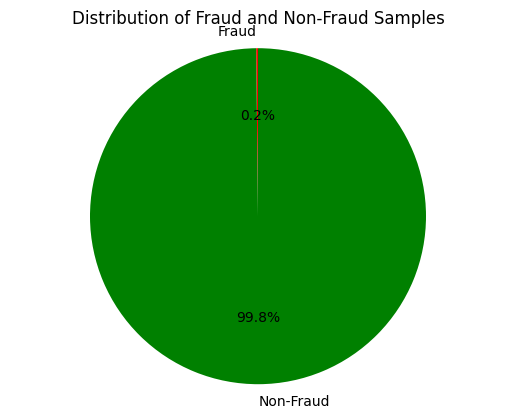

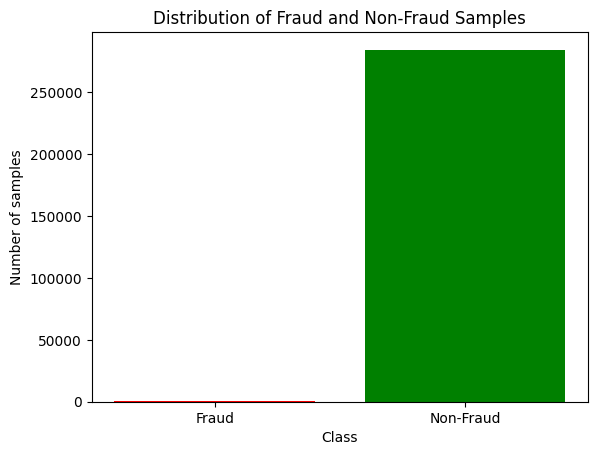

In [7]:
fraud_samples = len(Y[Y == 1])
non_fraud_samples = len(Y[Y == 0])

print("Number of fraud samples: ", fraud_samples)

print("Number of non-fraud samples: ", non_fraud_samples)

print("Percentage of fraud samples: ", round(fraud_samples / m * 100, 3), "%")

print("Percentage of non-fraud samples: ", round(non_fraud_samples / m * 100, 3), "%")

# Ploting the data to see the distribution of fraud and non-fraud samples
labels = ['Fraud', 'Non-Fraud']
sizes = [fraud_samples, non_fraud_samples]
colors = ['red','green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Fraud and Non-Fraud Samples')
plt.show()

# Now with a bar chart to have a better view of the distribution
plt.bar(labels, sizes, color=colors)
plt.title('Distribution of Fraud and Non-Fraud Samples')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

To balance the data, we can use the SMOTE technique. SMOTE (Synthetic Minority Over-sampling Technique) is a technique that generates synthetic samples from the minority class. It operates by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Let's balance the data using SMOTE.

Number of fraud samples:  492
Number of non-fraud samples:  492


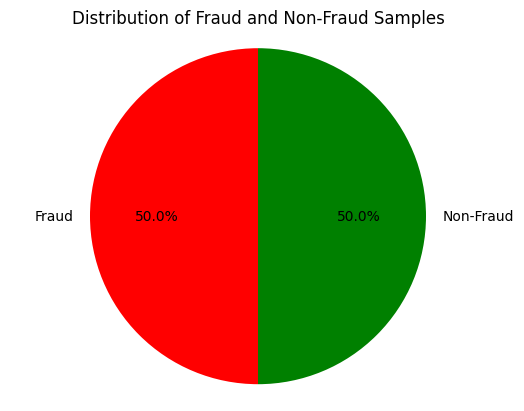

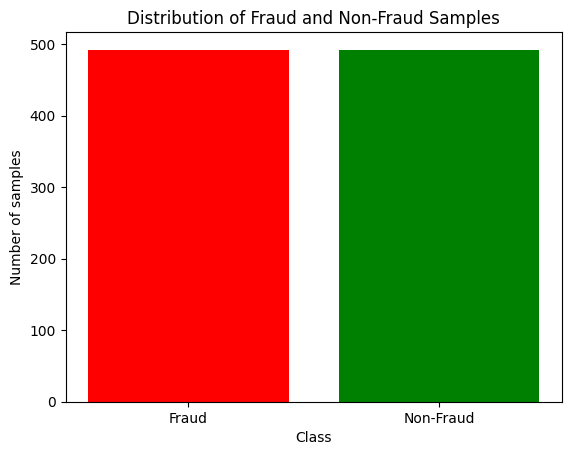

Number of samples:  984
Number of features:  29
Number of fraud samples:  492
Number of non-fraud samples:  492


In [8]:
# Balancing the dataset
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

normal = normal.sample(fraud_samples)

print("Number of fraud samples: ", len(fraud))
print("Number of non-fraud samples: ", len(normal))

balanced_data = pd.concat([fraud, normal])

# Ploting the data to see the distribution of fraud and non-fraud samples
labels = ['Fraud', 'Non-Fraud']
sizes = [fraud_samples, fraud_samples]
colors = ['red','green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Fraud and Non-Fraud Samples')
plt.show()

# Now with a bar chart to have a better view of the distribution
plt.bar(labels, sizes, color=colors)
plt.title('Distribution of Fraud and Non-Fraud Samples')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

data = balanced_data

X = balanced_data[features]

Y = balanced_data[label_column]

print("Number of samples: ", len(X))
print("Number of features: ", len(X.columns))
print("Number of fraud samples: ", len(Y[Y == 1]))
print("Number of non-fraud samples: ", len(Y[Y == 0]))

# Data Normalization

Normalization is the process of scaling individual samples to have a unit norm. This dataset needs to be normalized because the features have different units, and this can lead to bias in the model. We will use the StandardScaler to normalize the data.

In [9]:
# Using the StandardScaler to normalize the data
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=features)

data = pd.concat([data[features], data[label_column]], axis=1)


# Feature Analysis

Let's start by analyzing the features and see if we can find any patterns.

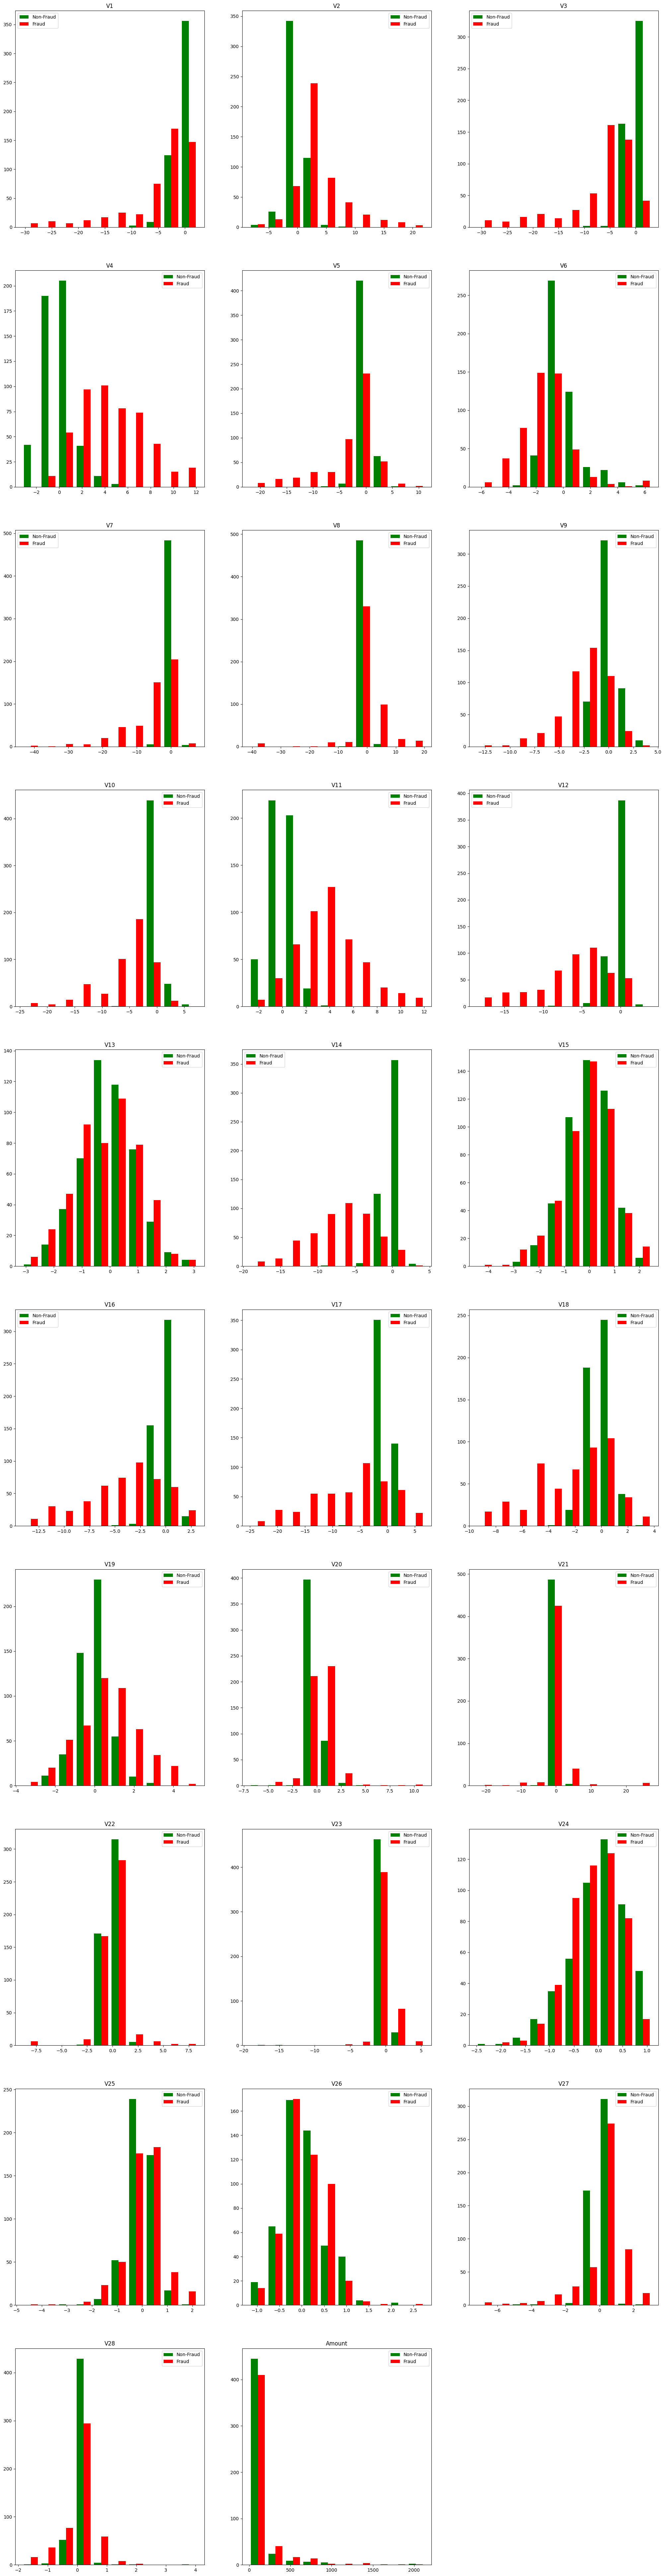

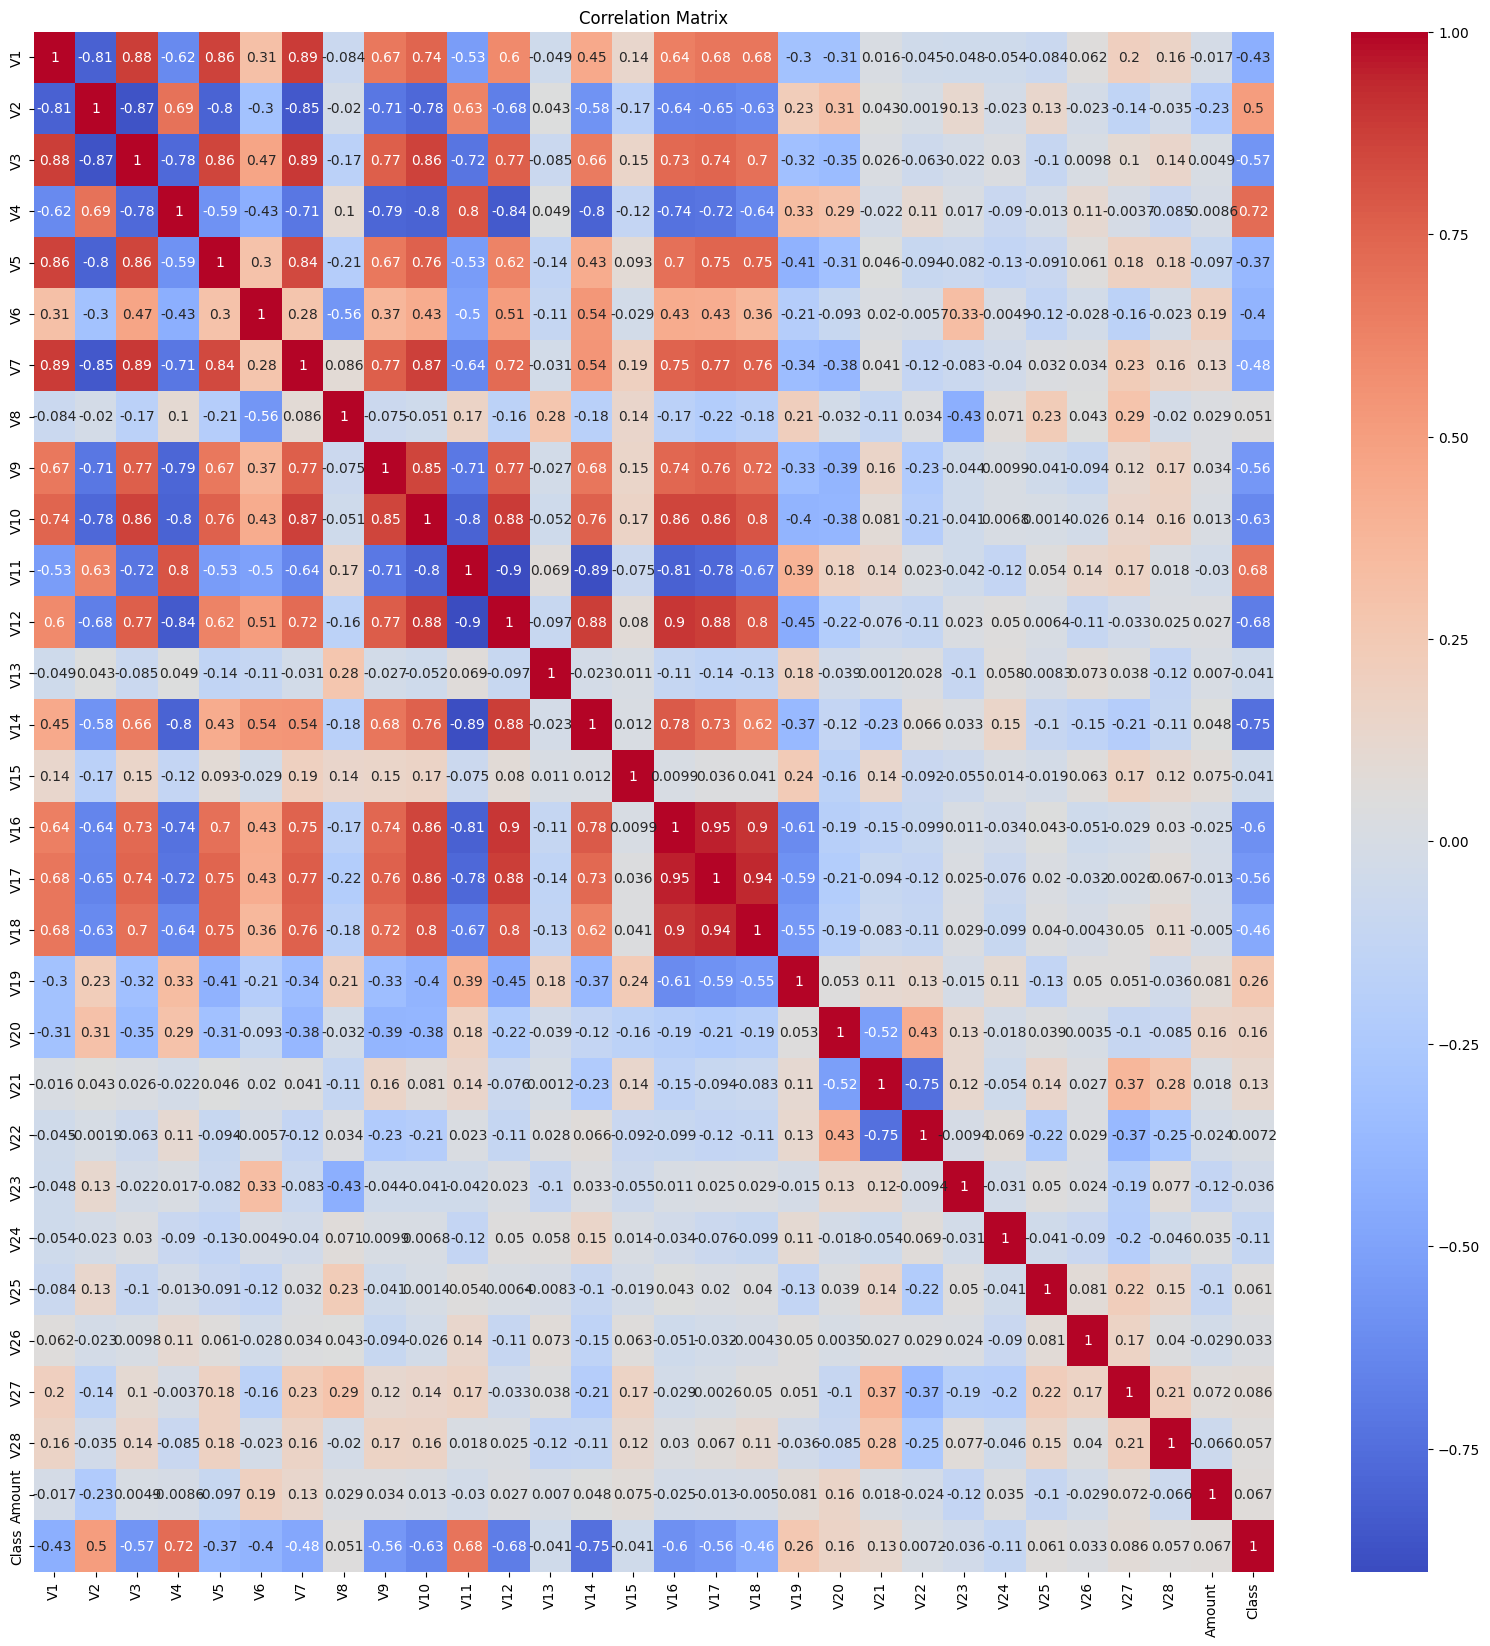

Best features: V4, V11, V2, V17, V9, V3, V16, V10, V12, V14


In [10]:
import seaborn as sns

import math

# Calculate the number of rows and columns needed to fit all features
n_cols = 3
n_rows = math.ceil(len(features) / n_cols)

num_figures = math.ceil(len(features) / (n_cols * 27))

for fig_num in range(num_figures):
    plt.figure(figsize=(25, n_rows * 10))
    # Histograms of the data to see the distribution of the features between fraud and non-fraud samples
    for i, feature in enumerate(features[fig_num * n_cols * 27: (fig_num + 1) * n_cols * 27]):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.hist([normal[feature], fraud[feature]], bins=10, color=['green', 'red'], label=['Non-Fraud', 'Fraud'])
        plt.title(feature)
        plt.legend()
    plt.show()


# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Selecting the features with the highest correlation with the label column
significance_threshold = .5
correlation_with_label = correlation_matrix[label_column].drop(label_column).sort_values(ascending=False)

best_features = correlation_with_label[abs(correlation_with_label) > significance_threshold].index.tolist()

print("Best features:", ', '.join(best_features))


When examining the correlation matrix within the context of the Class variable, determining the predominant influential features becomes a challenging task. It's particularly arduous to pinpoint which features carry more weight, as the negative correlations stand out more conspicuously.

Yet, the inclusion of the subSample offers a clearer perspective. Not only does it facilitate the identification of negatively correlated features, but it also aids in discerning positively correlated ones.

However, the ultimate aim with this correlation matrix is to ascertain which features lean towards the extremes. These extremes serve as vital indicators, helping us discern fraudulent transactions from genuine ones.

Features exhibiting a closer proximity to red denote a positive correlation. Consequently, higher values in these features signify a higher likelihood of fraudulence. Notably, V4 and V11 fall into this category.

Conversely, features closer to blue illustrate a negative correlation. In essence, lower values in these features signal a heightened probability of fraudulent activity. Prominent examples encompass V3, V9, V10, V12, V16, and V17.

By leveraging these insights, we can effectively delineate the crucial features that significantly contribute to our understanding of fraudulent transactions.

In conclusion, the features that were identified in both cases as the greatest indicators of fraud were: V4, V11, V9, V17, V3, V16, V10, V12, V14


## Trainning and Comparing Models

In [11]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import learning_curve, ShuffleSplit


def compare_algorithms (algorithms, X, y):
    fig, charts = plt.subplots(6, len(algorithms), figsize=(6*len(algorithms), 35))

    features_train, features_test, labels_train, labels_test = train_test_split(X, y, stratify = y)

    for i in range(len(algorithms)):
        chart = charts[:, i]

        algorithm = algorithms[i]
        algorithm_name = algorithm.__class__.__name__

        if i == 0:
            algorithm_name = "Logistic Regression (No Penalty)"
        
        print(algorithm_name)

        algorithm.fit(features_train, labels_train)

        labels_predicted_train = algorithm.predict(features_train)
        accuracy_train = sum(labels_train == labels_predicted_train) / float(len(labels_predicted_train))
        f1_train = f1_score(labels_train, labels_predicted_train, average='weighted')
        print("\tTrain")
        print("\t\tF1 score: {:.4f}.".format(f1_train))
        print("\t\tAccuracy score: {:.4f}.".format(accuracy_train))

        labels_predicted_test = algorithm.predict(features_test)
        accuracy_test = sum(labels_test == labels_predicted_test) / float(len(labels_predicted_test))
        f1_test = f1_score(labels_test, labels_predicted_test, average='weighted')
        print("\tTest")
        print("\t\tF1 score: {:.4f}.".format(f1_test))
        print("\t\tAccuracy score: {:.4f}.\n".format(accuracy_test))

        print("\tPrecision score: {:.4f}.".format(precision_score(labels_test, labels_predicted_test)))
        print("\tRecall score: {:.4f}.\n".format(recall_score(labels_test, labels_predicted_test)))

        cross_validator = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
        train_sizes, train_scores, test_scores, fit_times, scores_times = learning_curve(algorithm, X, y, cv=cross_validator, n_jobs=4, return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)           
        test_scores_mean = np.mean(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        scores_times_mean = np.mean(scores_times, axis=1)

        confusion_matrix_train = confusion_matrix(labels_train, labels_predicted_train) 
        sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues", ax=chart[0])
        chart[0].set_xlabel("Predicted Label")
        chart[0].set_ylabel("True Label")
        chart[0].set_title("Confusion Matrix (Train - {})".format(algorithm_name))

        confusion_matrix_test = confusion_matrix(labels_test, labels_predicted_test) 
        sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", ax=chart[1])
        chart[1].set_xlabel("Predicted Label")
        chart[1].set_ylabel("True Label")
        chart[1].set_title("Confusion Matrix (Test - {})".format(algorithm_name))

        chart[2].grid()
        chart[2].set_ylim(*np.linspace(0.1, 1.0, 1))
        chart[2].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
        chart[2].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-Validation score")
        chart[2].set_title("Learning Curves ({})".format(algorithm_name))
        chart[2].set_xlabel("Training examples")
        chart[2].set_ylabel("Score")
        chart[2].legend(loc="best")

        chart[3].grid()
        chart[3].plot(train_sizes, fit_times_mean, "o-")
        chart[3].set_xlabel("Training examples")
        chart[3].set_ylabel("Fit Times")
        chart[3].set_title("Scalability of the model")

        fit_time_argsort = fit_times_mean.argsort()
        fit_time_sorted = fit_times_mean[fit_time_argsort]
        test_scores_mean_sorted = test_scores_mean[fit_time_argsort]

        chart[4].grid()
        chart[4].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
        chart[4].set_xlabel("Fit Times")
        chart[4].set_ylabel("Score")
        chart[4].set_title("Performance of the model (Fit Times)")

        score_time_argsort = scores_times_mean.argsort()
        score_time_sorted = scores_times_mean[score_time_argsort]
        test_scores_mean_sorted = test_scores_mean[score_time_argsort]

        chart[5].grid()
        chart[5].plot(score_time_sorted, test_scores_mean_sorted, "o-")
        chart[5].set_xlabel("Score Times")
        chart[5].set_ylabel("Score")
        chart[5].set_title("Performance of the model (Score Times)")

algorithms = [LogisticRegression(penalty=None, max_iter=5000), LogisticRegression(penalty='l2', max_iter=5000), SVC(kernel="rbf", max_iter=5000), MLPClassifier(max_iter=5000)]

### Whole Data

Training the algorithms with the whole dataset

Logistic Regression (No Penalty)
	Train
		F1 score: 0.9458.
		Accuracy score: 0.9458.
	Test
		F1 score: 0.9512.
		Accuracy score: 0.9512.

	Precision score: 0.9587.
	Recall score: 0.9431.

LogisticRegression
	Train
		F1 score: 0.9511.
		Accuracy score: 0.9512.
	Test
		F1 score: 0.9431.
		Accuracy score: 0.9431.

	Precision score: 0.9658.
	Recall score: 0.9187.

SVC
	Train
		F1 score: 0.9498.
		Accuracy score: 0.9499.
	Test
		F1 score: 0.9471.
		Accuracy score: 0.9472.

	Precision score: 0.9825.
	Recall score: 0.9106.

MLPClassifier
	Train
		F1 score: 0.9973.
		Accuracy score: 0.9973.
	Test
		F1 score: 0.9471.
		Accuracy score: 0.9472.

	Precision score: 0.9583.
	Recall score: 0.9350.



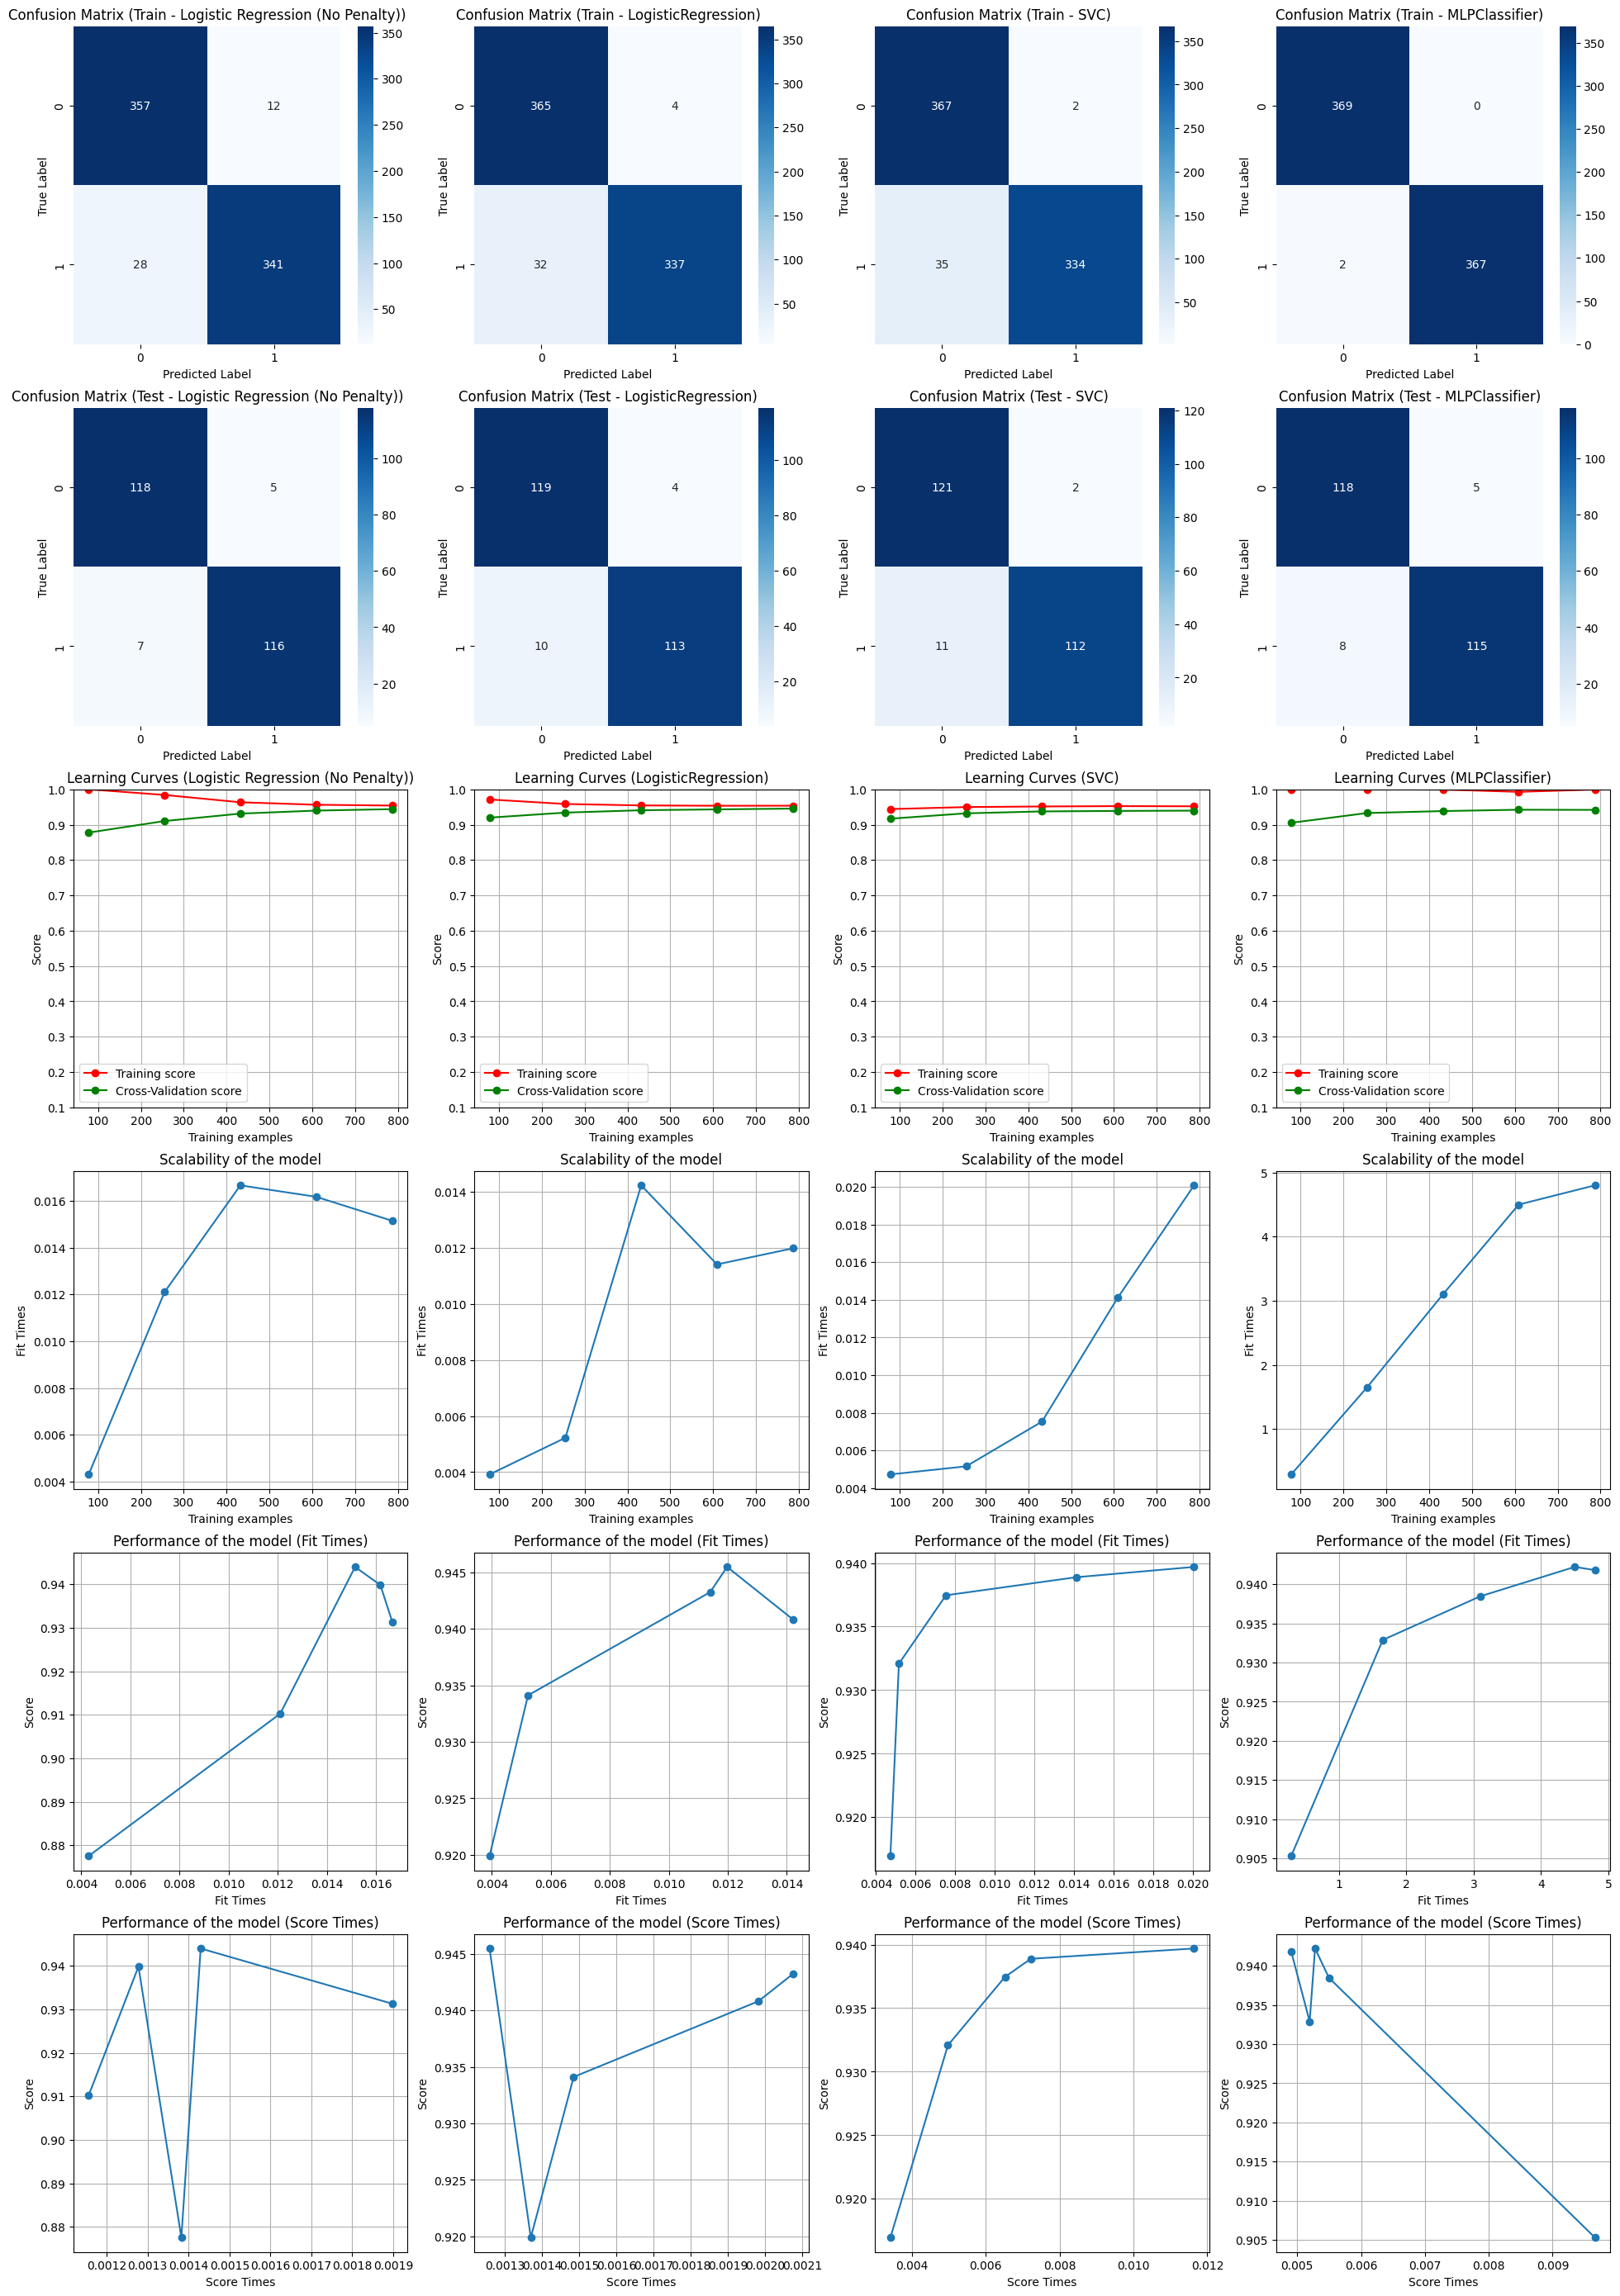

In [12]:
print("Training the algorithms with the whole dataset\n")


compare_algorithms(algorithms, X, Y)

### Best Features (Correlation Matrix)

Training the algorithms with the best features 

Logistic Regression (No Penalty)
	Train
		F1 score: 0.9444.
		Accuracy score: 0.9444.
	Test
		F1 score: 0.9431.
		Accuracy score: 0.9431.

	Precision score: 0.9504.
	Recall score: 0.9350.

LogisticRegression
	Train
		F1 score: 0.9430.
		Accuracy score: 0.9431.
	Test
		F1 score: 0.9431.
		Accuracy score: 0.9431.

	Precision score: 0.9658.
	Recall score: 0.9187.

SVC
	Train
		F1 score: 0.9388.
		Accuracy score: 0.9390.
	Test
		F1 score: 0.9389.
		Accuracy score: 0.9390.

	Precision score: 0.9821.
	Recall score: 0.8943.

MLPClassifier
	Train
		F1 score: 0.9430.
		Accuracy score: 0.9431.
	Test
		F1 score: 0.9471.
		Accuracy score: 0.9472.

	Precision score: 0.9583.
	Recall score: 0.9350.



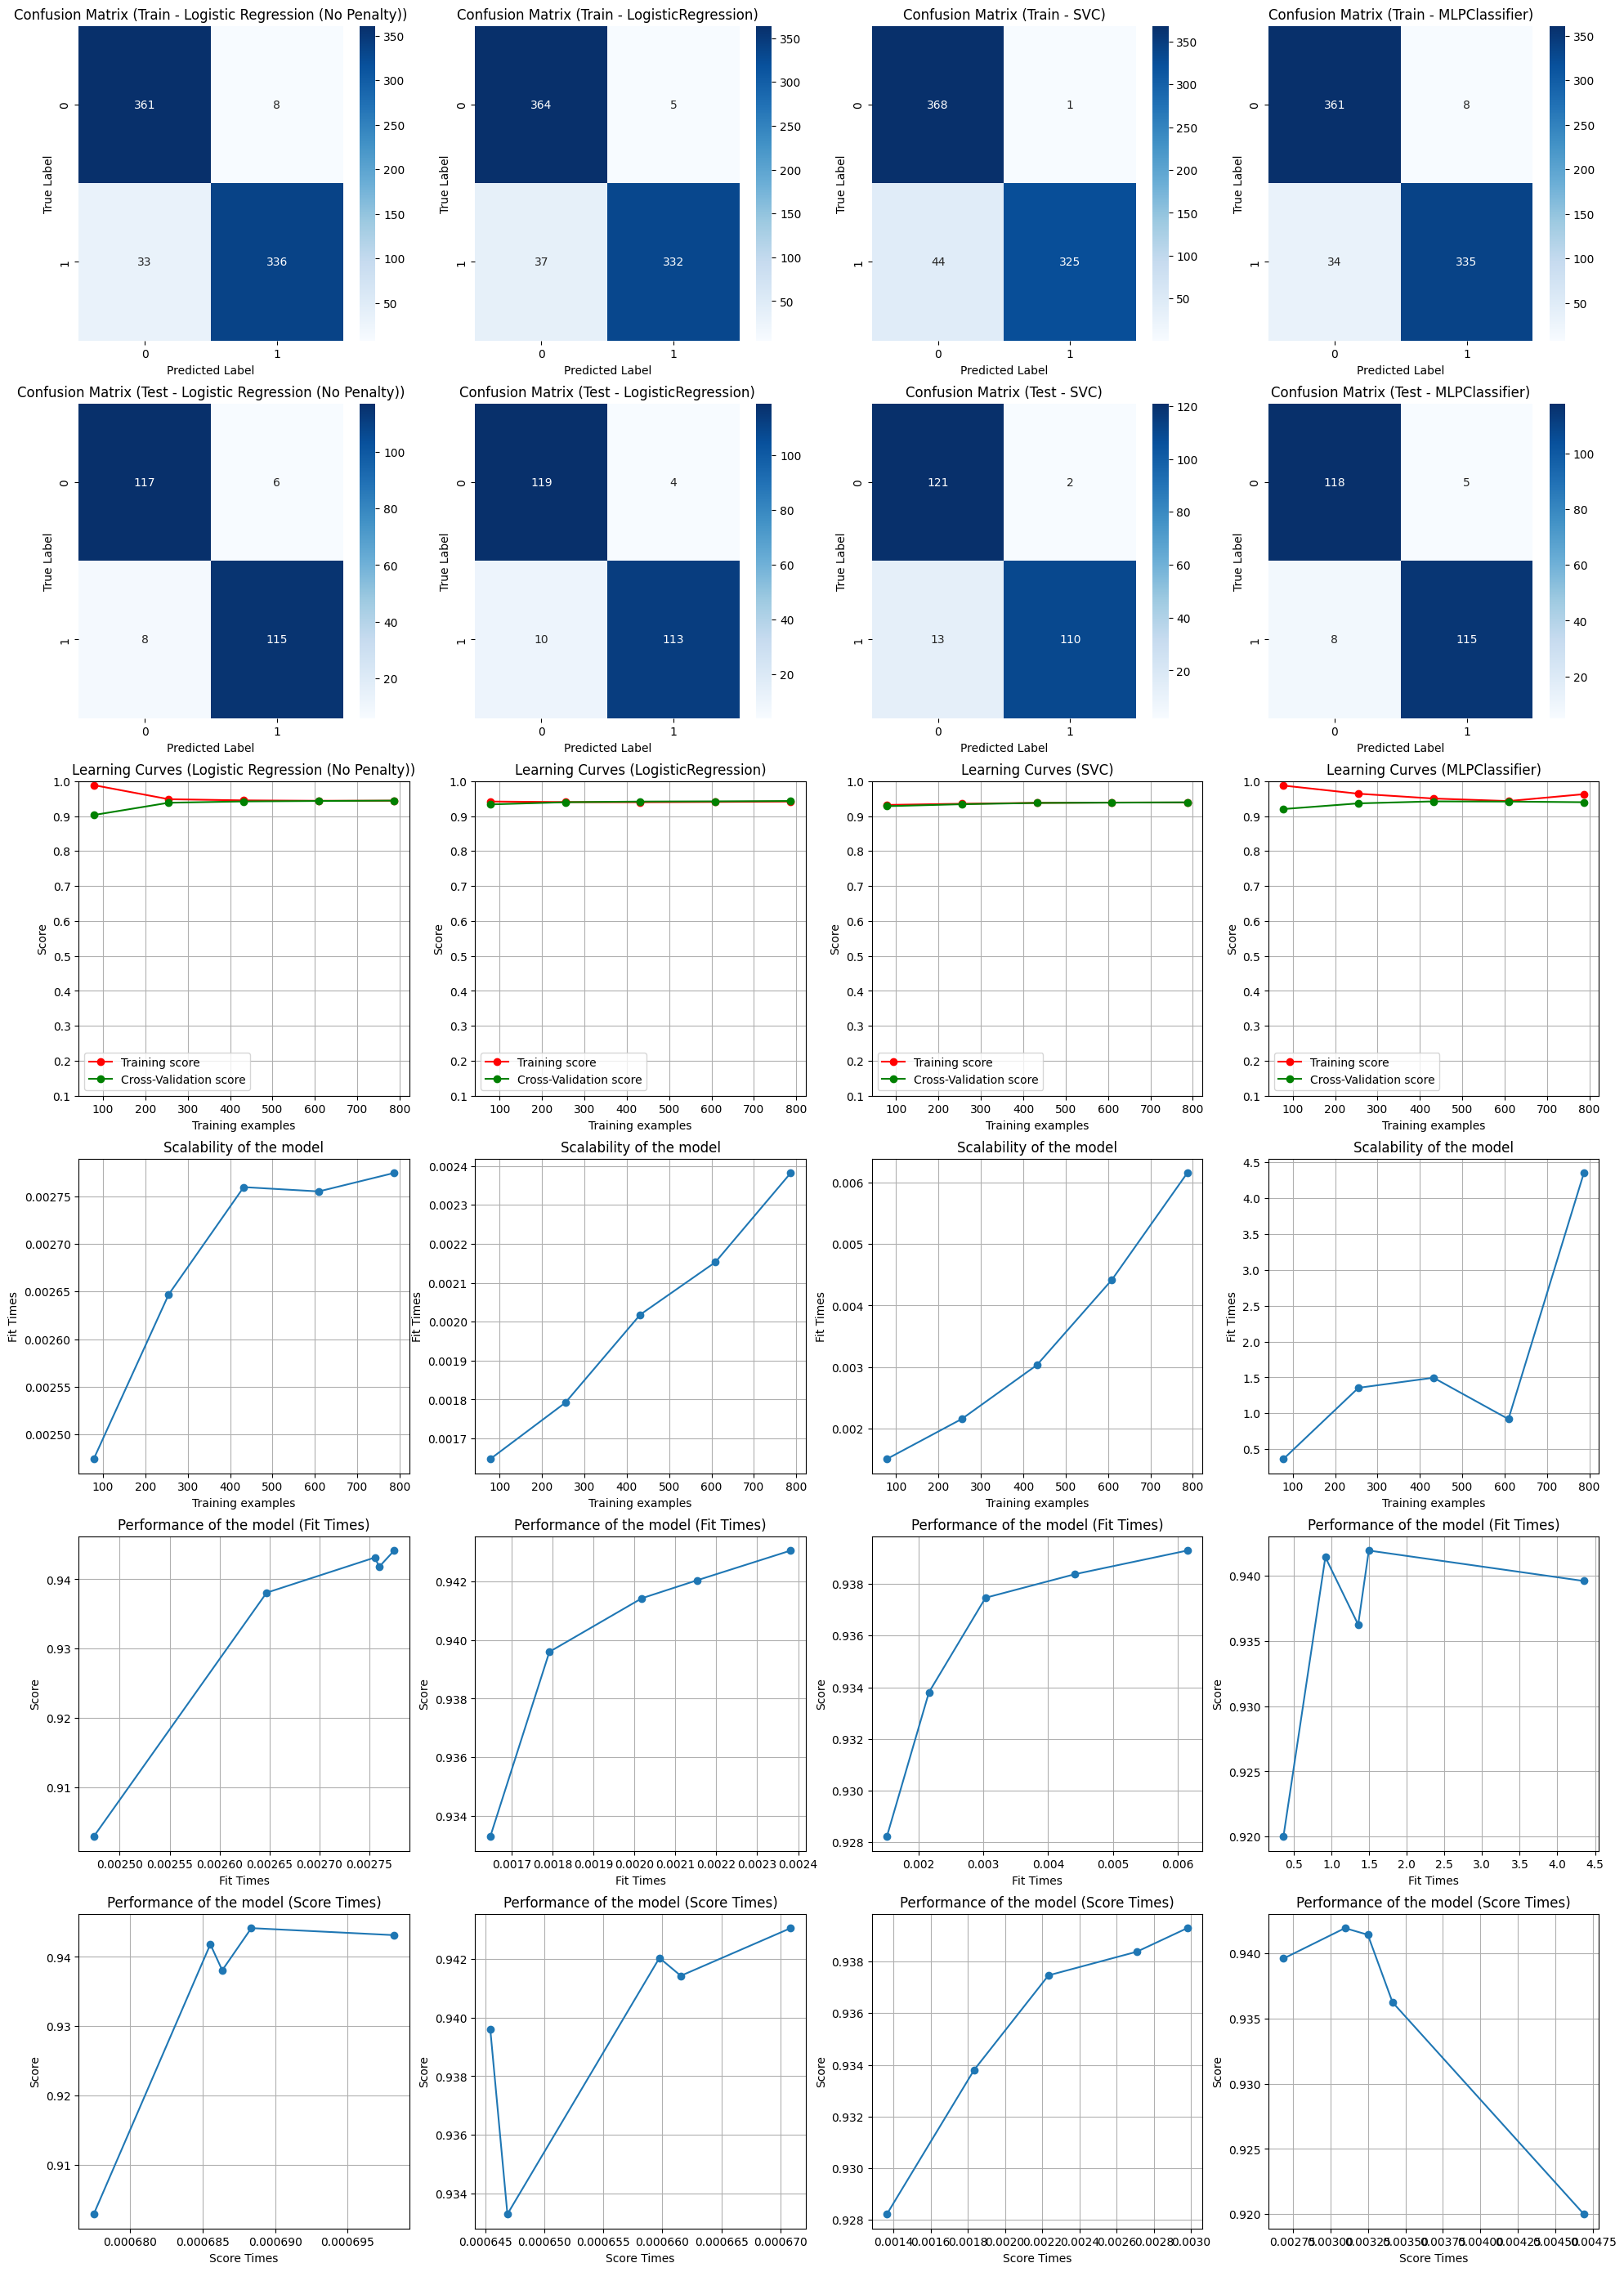

In [13]:
print("Training the algorithms with the best features \n")

compare_algorithms(algorithms, X[best_features], Y)

### Best Features (Parameter Tunning)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def parameter_tuning(X_train, X_test, y_train, y_test, models, tuned_parameters, include_grid=False):
    
    scores = ['accuracy']
    
    best_parameters = []

    i = 0
    for model in models:
        for score in scores:
            print(score)

            algorithm = GridSearchCV(
                model, tuned_parameters[i], scoring=score
            )
            
            algorithm.fit(X_train, y_train)

            print("\tBest parameters set found on development set: " + str(algorithm.best_params_))
            best_parameters.append(algorithm.best_params_)
            if include_grid:
                print("\tGrid scores on development set:")
                means = algorithm.cv_results_['mean_test_score']
                stds = algorithm.cv_results_['std_test_score']
                for mean, std, params in zip(means, stds, algorithm.cv_results_['params']):
                    print("\t%0.3f (+/-%0.03f) for %r"
                        % (mean, std * 2, params))
                print()

            print("\tClassification report:\n")
            y_true, y_pred = y_test, algorithm.predict(X_test)
            print(classification_report(y_true, y_pred))
        i += 1

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y)

tuned_logisticRegression_parameters = [
    {
        'solver': ['liblinear'], 
        'max_iter': [5000], 
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
        'class_weight': ['balanced'], 
        'penalty': ['l1', 'l2']
    }
]

tuned_SVC_parameters = [
    {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
        'kernel': ['rbf']
    }
]

tuned_MLPClassifier_parameters = [
    {
        'solver': ['adam'], 
        'max_iter': [5000],
        'hidden_layer_sizes': [(12,12), (12,12,12)], 
        'activation': ['tanh', 'relu'],
        'alpha': [1e-3,1e-4], 
        'learning_rate': ['constant', 'invscaling'], 
        'learning_rate_init': [0.001, 0.01]
    }
]

parameter_tuning(X_train, X_test, y_train, y_test, [LogisticRegression(), SVC(), MLPClassifier()], [tuned_logisticRegression_parameters, tuned_SVC_parameters, tuned_MLPClassifier_parameters])

accuracy
	Best parameters set found on development set: {'C': 1, 'class_weight': 'balanced', 'max_iter': 5000, 'penalty': 'l1', 'solver': 'liblinear'}
	Classification report:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       123
           1       0.97      0.85      0.90       123

    accuracy                           0.91       246
   macro avg       0.92      0.91      0.91       246
weighted avg       0.92      0.91      0.91       246

accuracy
	Best parameters set found on development set: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
	Classification report:

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       123
           1       0.96      0.85      0.91       123

    accuracy                           0.91       246
   macro avg       0.92      0.91      0.91       246
weighted avg       0.92      0.91      0.91       246

accuracy
	Best parameters set found on developm

Logistic Regression (No Penalty)
	Train
		F1 score: 0.9525.
		Accuracy score: 0.9526.
	Test
		F1 score: 0.9349.
		Accuracy score: 0.9350.

	Precision score: 0.9735.
	Recall score: 0.8943.

SVC
	Train
		F1 score: 0.9525.
		Accuracy score: 0.9526.
	Test
		F1 score: 0.9267.
		Accuracy score: 0.9268.

	Precision score: 0.9730.
	Recall score: 0.8780.

MLPClassifier
	Train
		F1 score: 0.9973.
		Accuracy score: 0.9973.
	Test
		F1 score: 0.9228.
		Accuracy score: 0.9228.

	Precision score: 0.9194.
	Recall score: 0.9268.



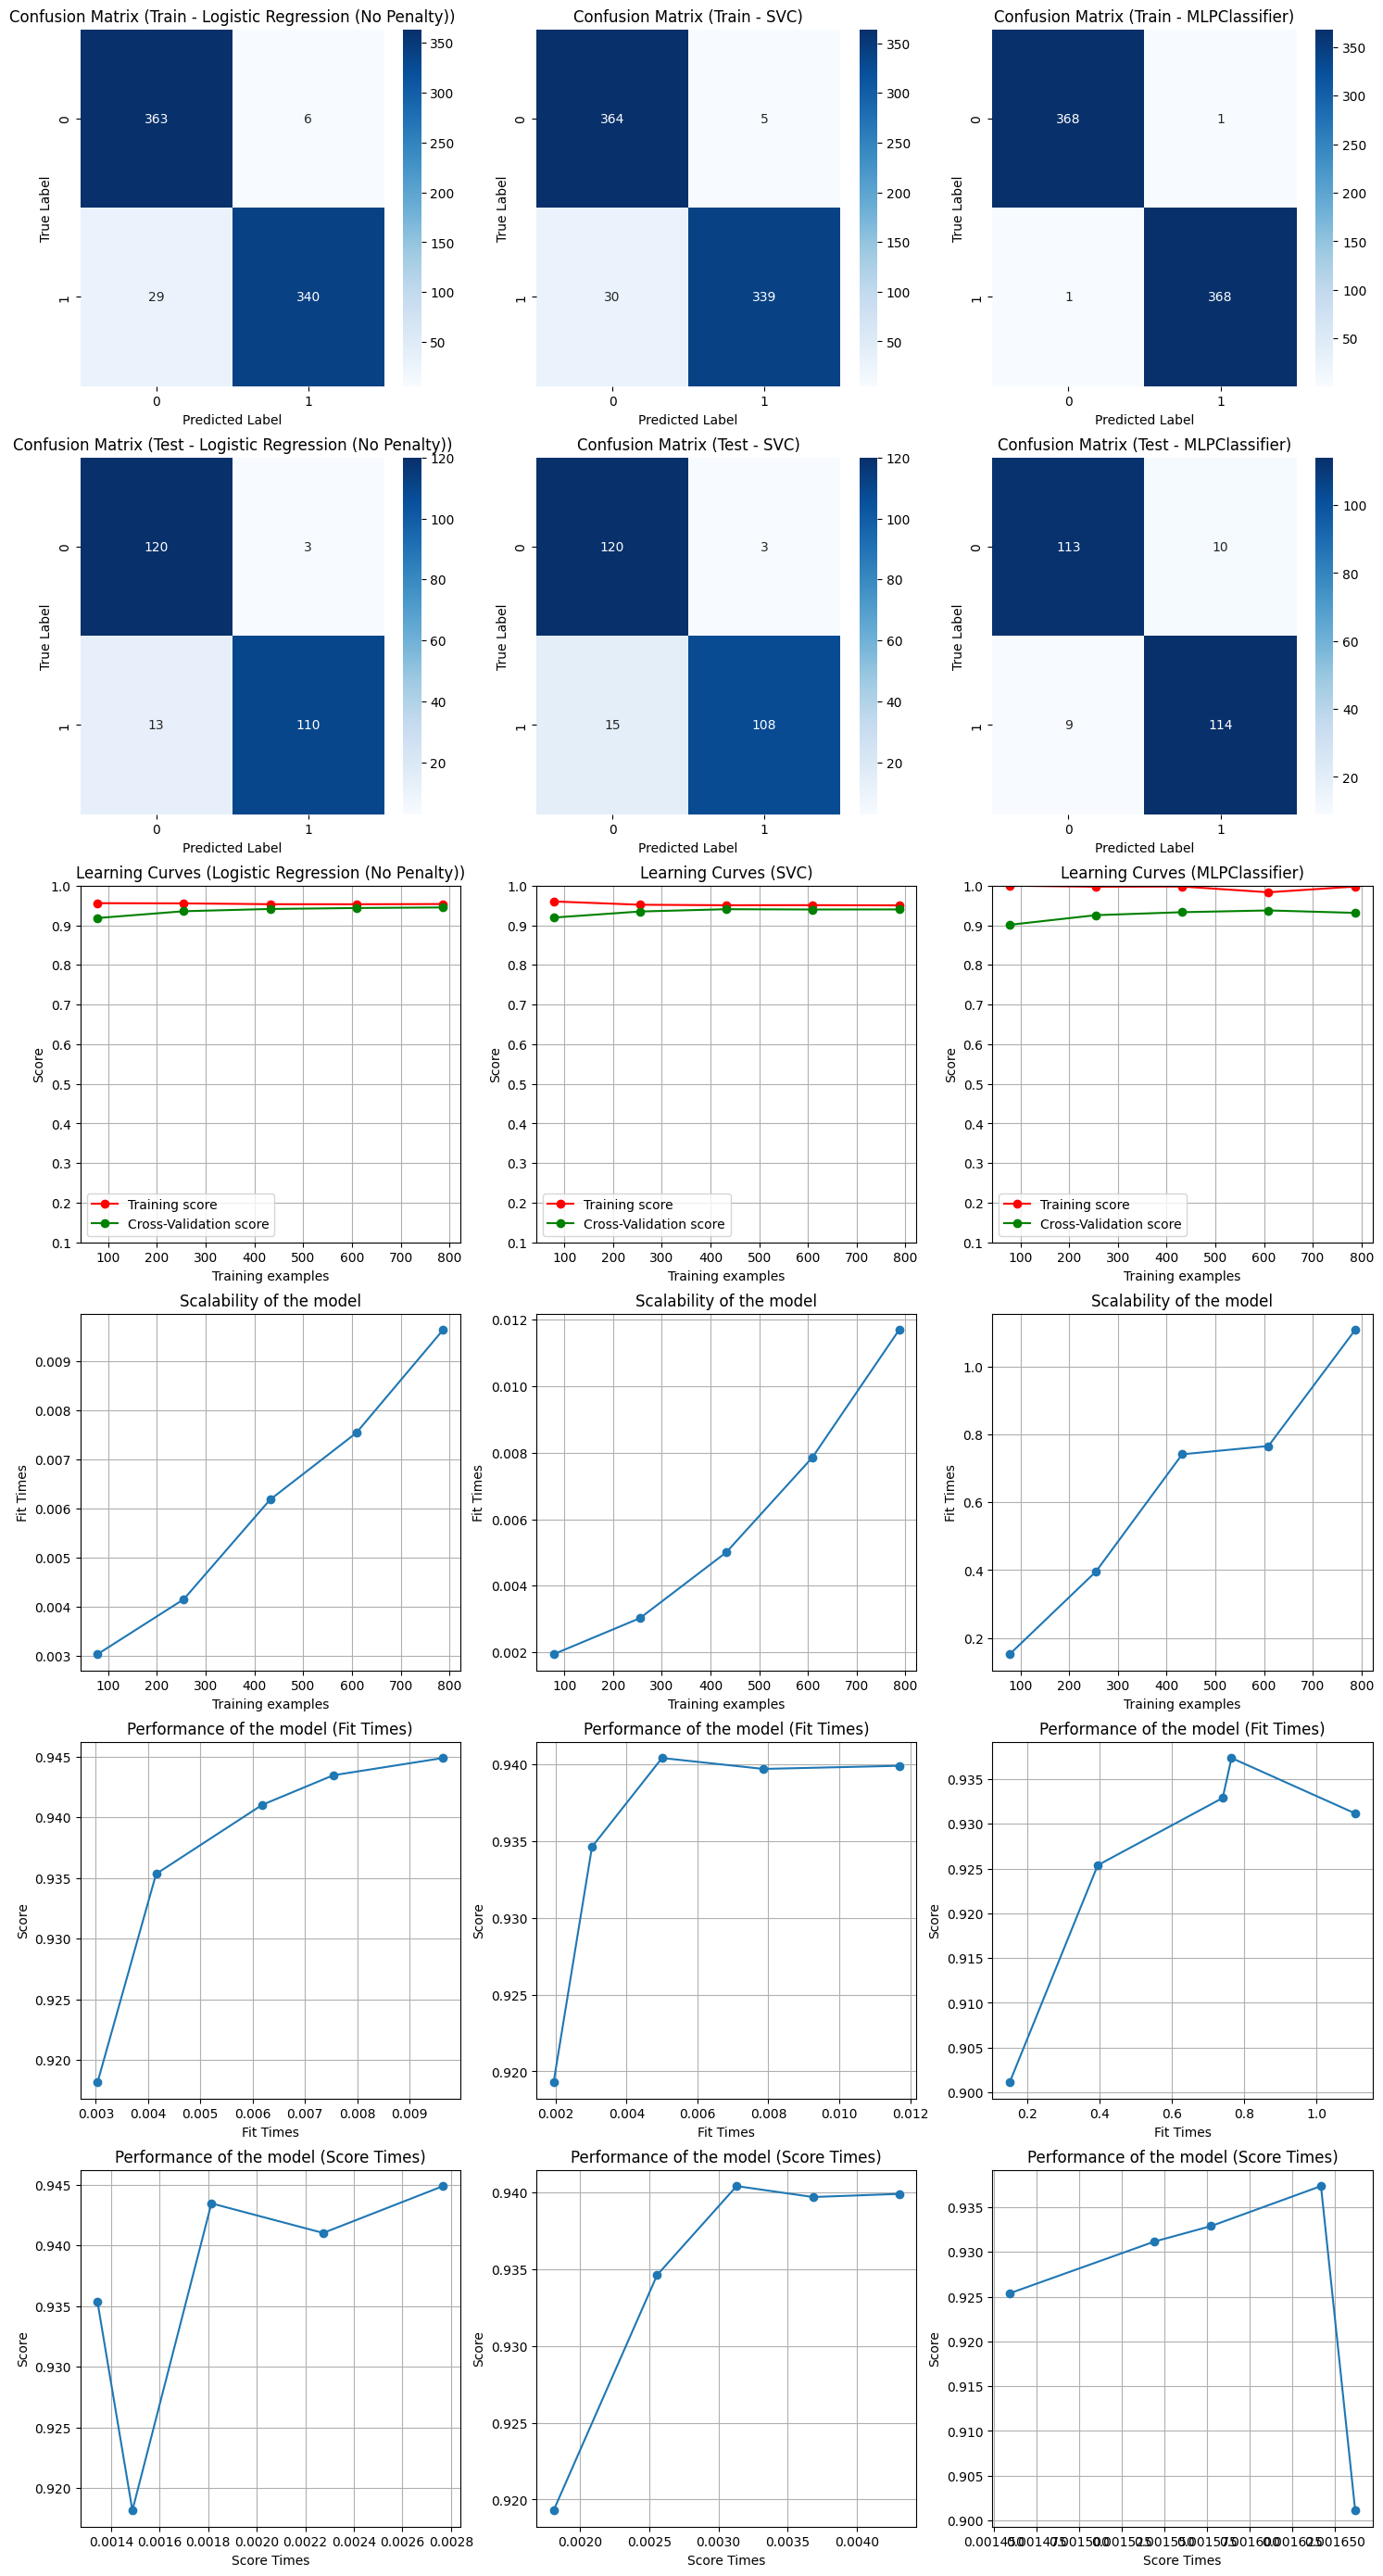

In [16]:
algorithms = [
    LogisticRegression(C=1, class_weight='balanced', max_iter=5000, penalty='l1', solver='liblinear'), 
    SVC(C=100, gamma=0.001, kernel='rbf'),
    MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=(12, 12), learning_rate='invscaling', learning_rate_init=0.001, max_iter=5000, solver='adam')
]

compare_algorithms(algorithms, X, Y)

### Best Features (GradientBoostingRegressor)

['V10' 'V12' 'V8' 'V4' 'V14']
V14


Text(0.5, 1.0, 'Feature Importance (MDI)')

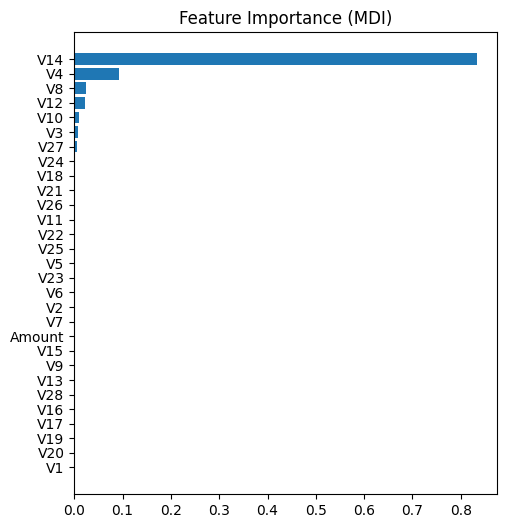

In [17]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor


params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": 'absolute_error',
}

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y)

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

features = X.columns.values
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
five_most_important_features = features[sorted_idx][-5:]
print (five_most_important_features)
print (five_most_important_features[-1])
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features)[sorted_idx])
plt.title("Feature Importance (MDI)")

Logistic Regression (No Penalty)
	Train
		F1 score: 0.9197.
		Accuracy score: 0.9201.
	Test
		F1 score: 0.9145.
		Accuracy score: 0.9146.

	Precision score: 0.9554.
	Recall score: 0.8699.

SVC
	Train
		F1 score: 0.9114.
		Accuracy score: 0.9119.
	Test
		F1 score: 0.9184.
		Accuracy score: 0.9187.

	Precision score: 0.9725.
	Recall score: 0.8618.

MLPClassifier
	Train
		F1 score: 0.9197.
		Accuracy score: 0.9201.
	Test
		F1 score: 0.9145.
		Accuracy score: 0.9146.

	Precision score: 0.9554.
	Recall score: 0.8699.



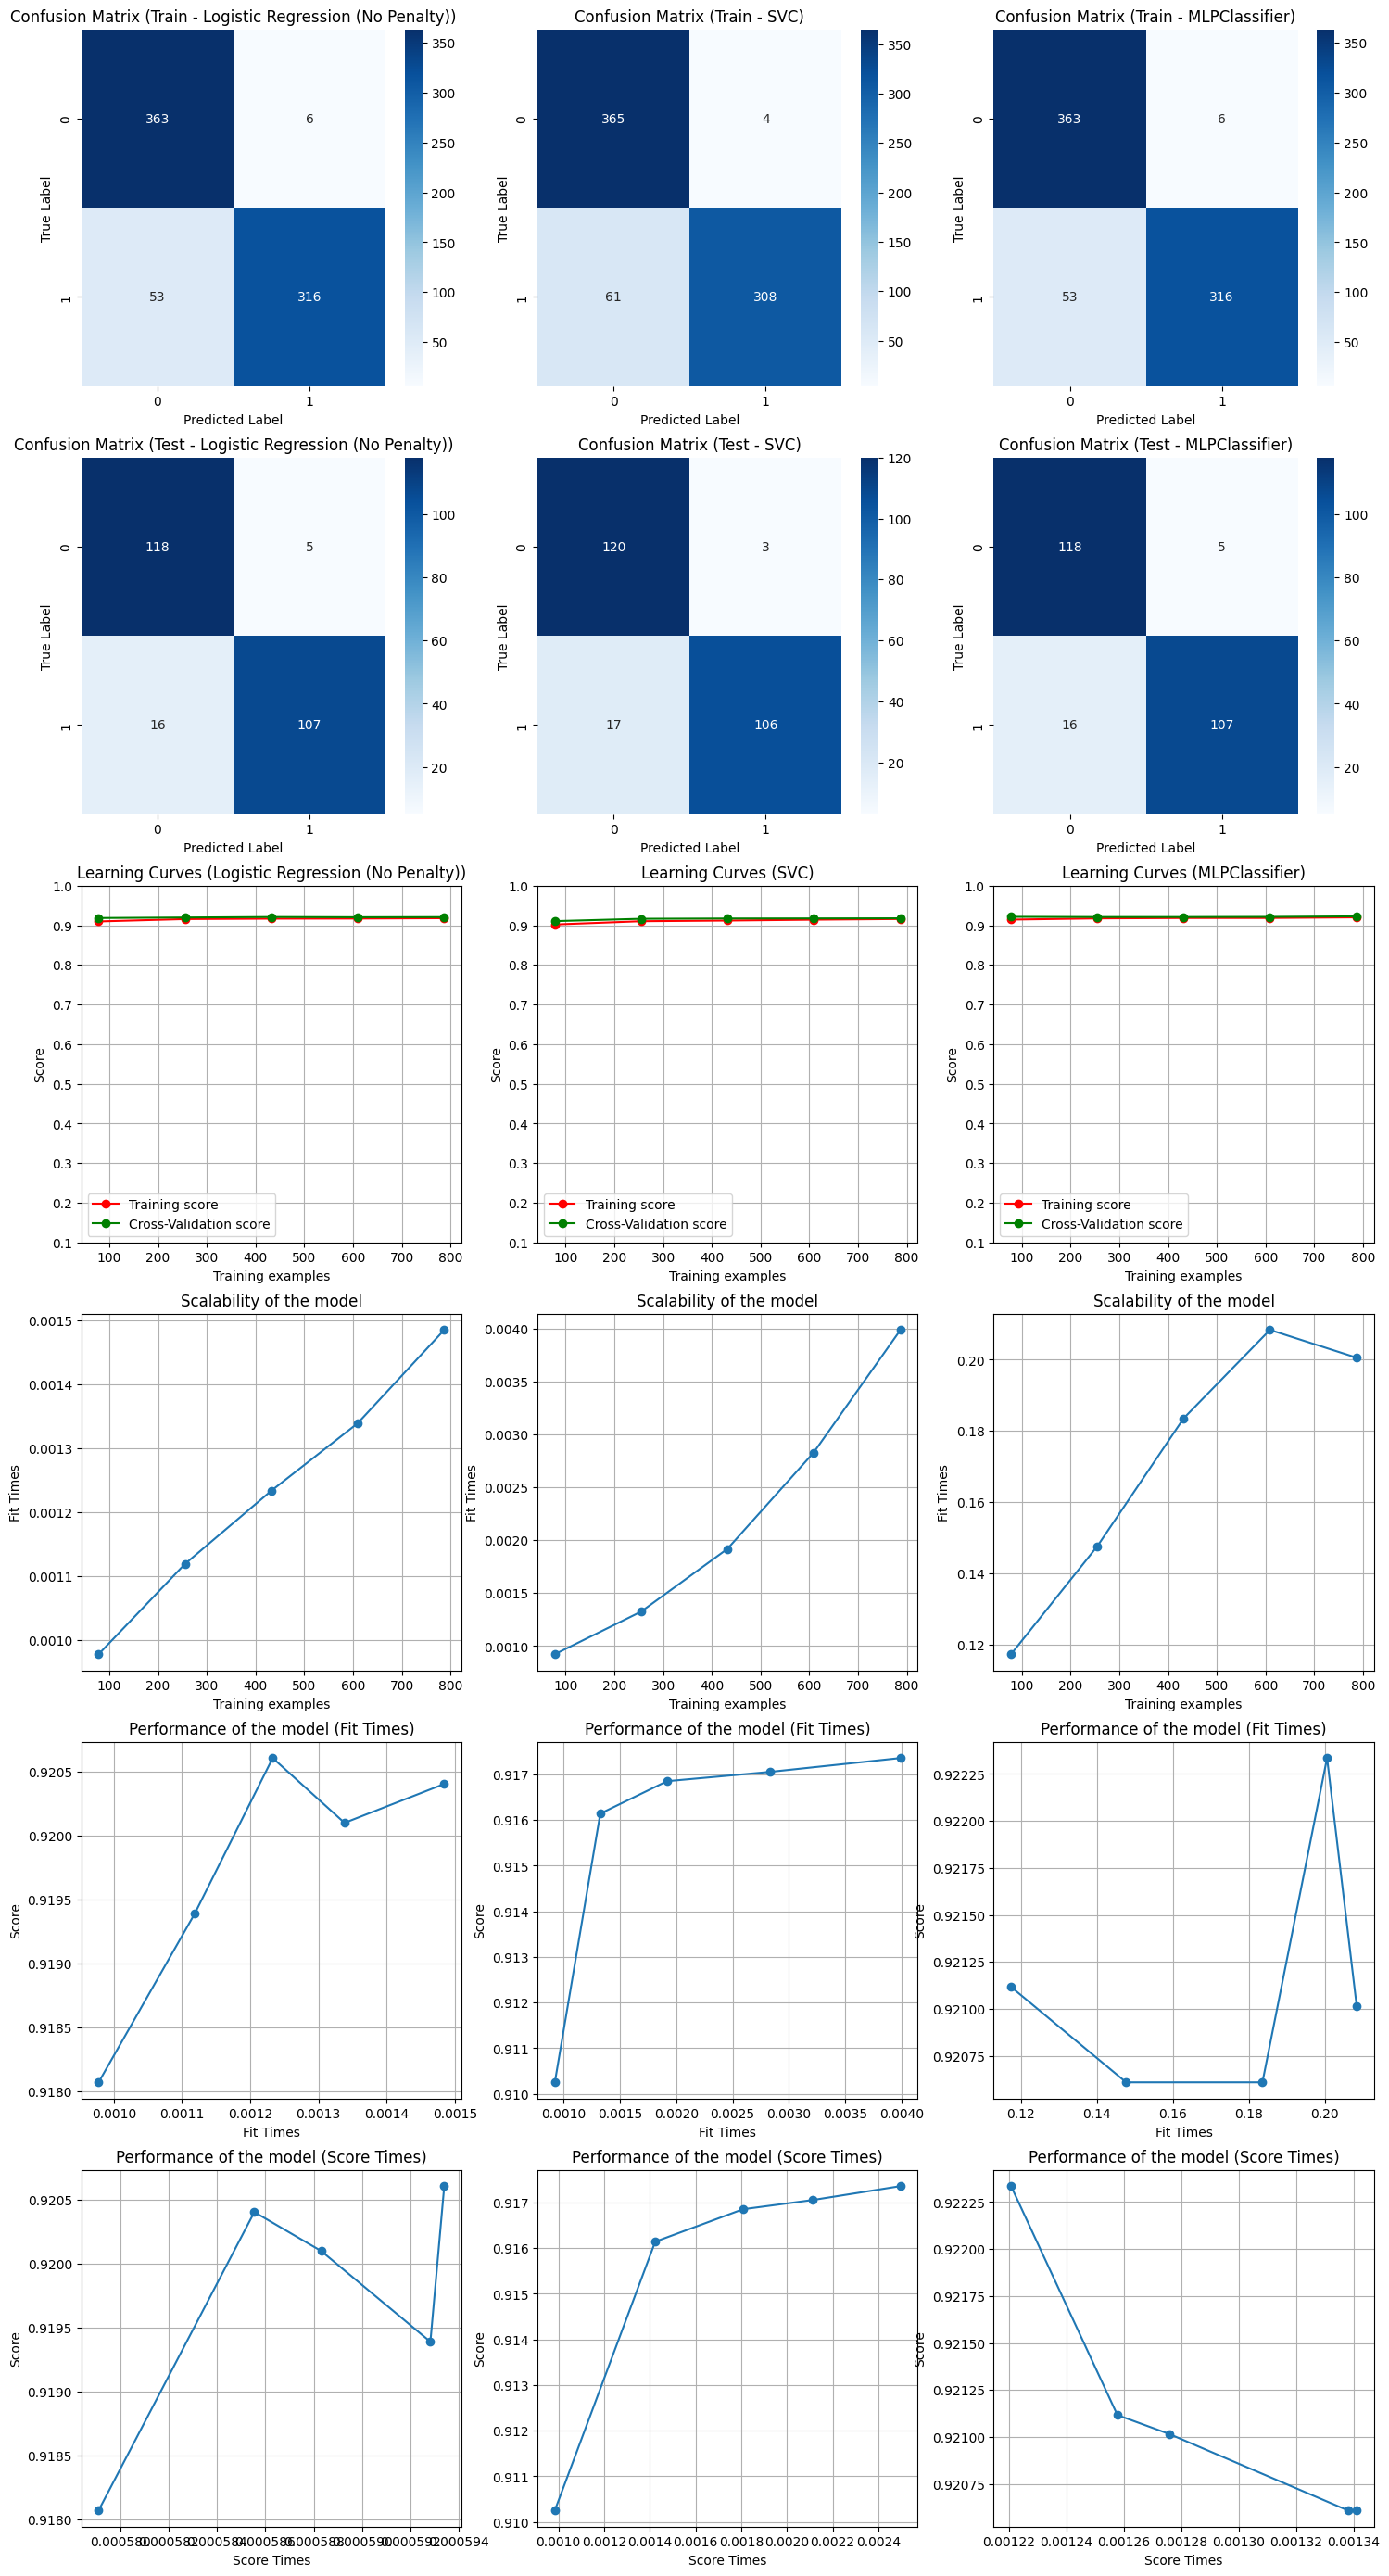

In [18]:
compare_algorithms(algorithms, X[[five_most_important_features[-1]]], Y)

Logistic Regression (No Penalty)
	Train
		F1 score: 0.9430.
		Accuracy score: 0.9431.
	Test
		F1 score: 0.9552.
		Accuracy score: 0.9553.

	Precision score: 0.9828.
	Recall score: 0.9268.

SVC
	Train
		F1 score: 0.9402.
		Accuracy score: 0.9404.
	Test
		F1 score: 0.9389.
		Accuracy score: 0.9390.

	Precision score: 0.9821.
	Recall score: 0.8943.

MLPClassifier
	Train
		F1 score: 0.9485.
		Accuracy score: 0.9485.
	Test
		F1 score: 0.9553.
		Accuracy score: 0.9553.

	Precision score: 0.9667.
	Recall score: 0.9431.



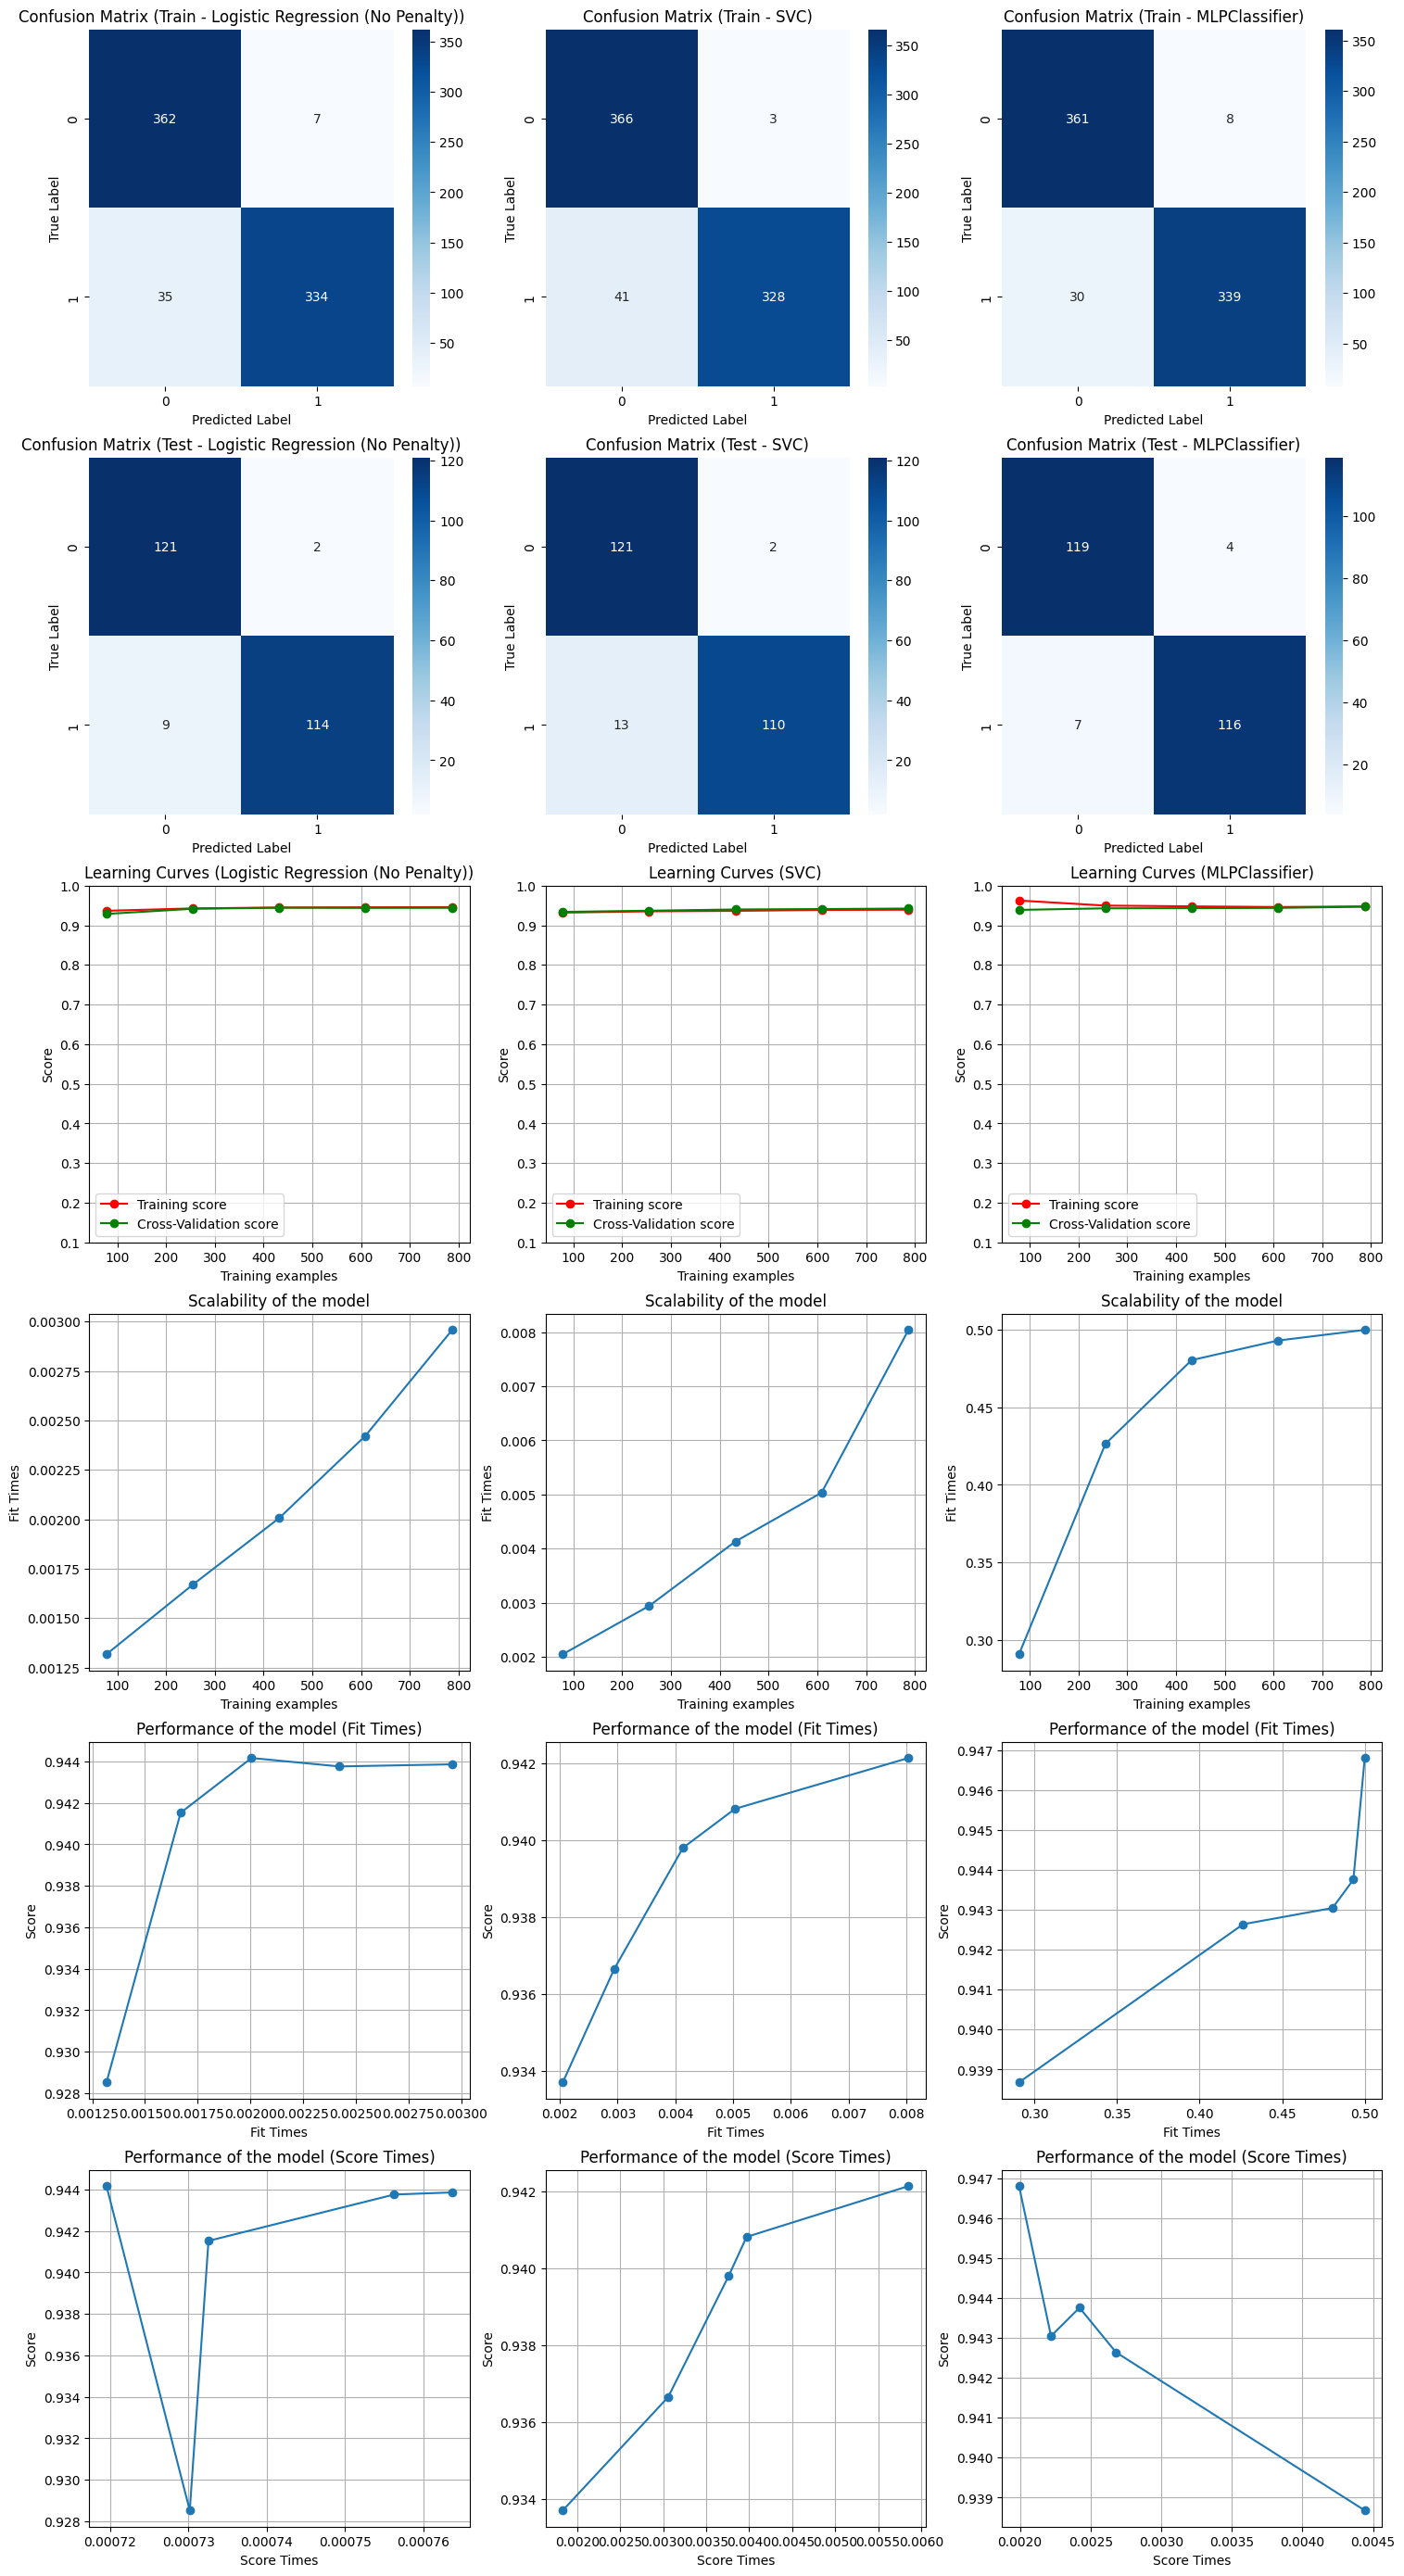

In [19]:
compare_algorithms(algorithms, X[five_most_important_features], Y)

### K-Fold

In [30]:
from sklearn.model_selection import KFold, validation_curve


def kfold_test(X_train, y_train, X_test, y_test, clf, k):
    kf = KFold(n_splits=k, shuffle=True)
    
    scores = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=k, return_estimator=True)

    avg_acc_score = sum(scores['test_score'])/k

    print('Accuracy of each fold - {}'.format(scores['test_score']))
    print('Avg accuracy : {}'.format(avg_acc_score))
    
    best_estimator = scores['estimator'][np.argmax(scores['test_score'])]

    y_pred_test = best_estimator.predict(X_test)
    acc_test = sum(y_test == y_pred_test) / float(len(y_pred_test))
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    print("Using the best estimator from CV:")
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1_test , acc_test))
    
    return y_pred_test

def basic_train_and_test(clf, X_train, X_test, y_train, y_test):

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    acc_train = sum(y_train == y_pred_train) / float(len(y_pred_train))
    f1_train = f1_score(y_train, y_pred_train, average='weighted')

    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1_train , acc_train))

    y_pred_test = clf.predict(X_test)
    acc_test = sum(y_test == y_pred_test) / float(len(y_pred_test))
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1_test , acc_test))
    
    return y_pred_test

Logistic Regression (No Penalty)
	Train
		F1 score: 0.9580.
		Accuracy score: 0.9580.
	Test
		F1 score: 0.9306.
		Accuracy score: 0.9309.

	Precision score: 0.9907.
	Recall score: 0.8699.

SVC
	Train
		F1 score: 0.9579.
		Accuracy score: 0.9580.
	Test
		F1 score: 0.9182.
		Accuracy score: 0.9187.

	Precision score: 1.0000.
	Recall score: 0.8374.

MLPClassifier
	Train
		F1 score: 0.9986.
		Accuracy score: 0.9986.
	Test
		F1 score: 0.9308.
		Accuracy score: 0.9309.

	Precision score: 0.9649.
	Recall score: 0.8943.

Accuracy of each fold - [0.95675676 0.91351351 0.94021739 0.93478261]
Avg accuracy : 0.9363175675675676
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.9308 , 0.9309.
Accuracy of each fold - [0.95675676 0.88648649 0.94021739 0.91847826]
Avg accuracy : 0.9254847238542891
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.9470 , 0.9472.
Accuracy of each fold - [0.91351351 0.9027027  0.95108696 0.91304348]
Avg accuracy : 0.

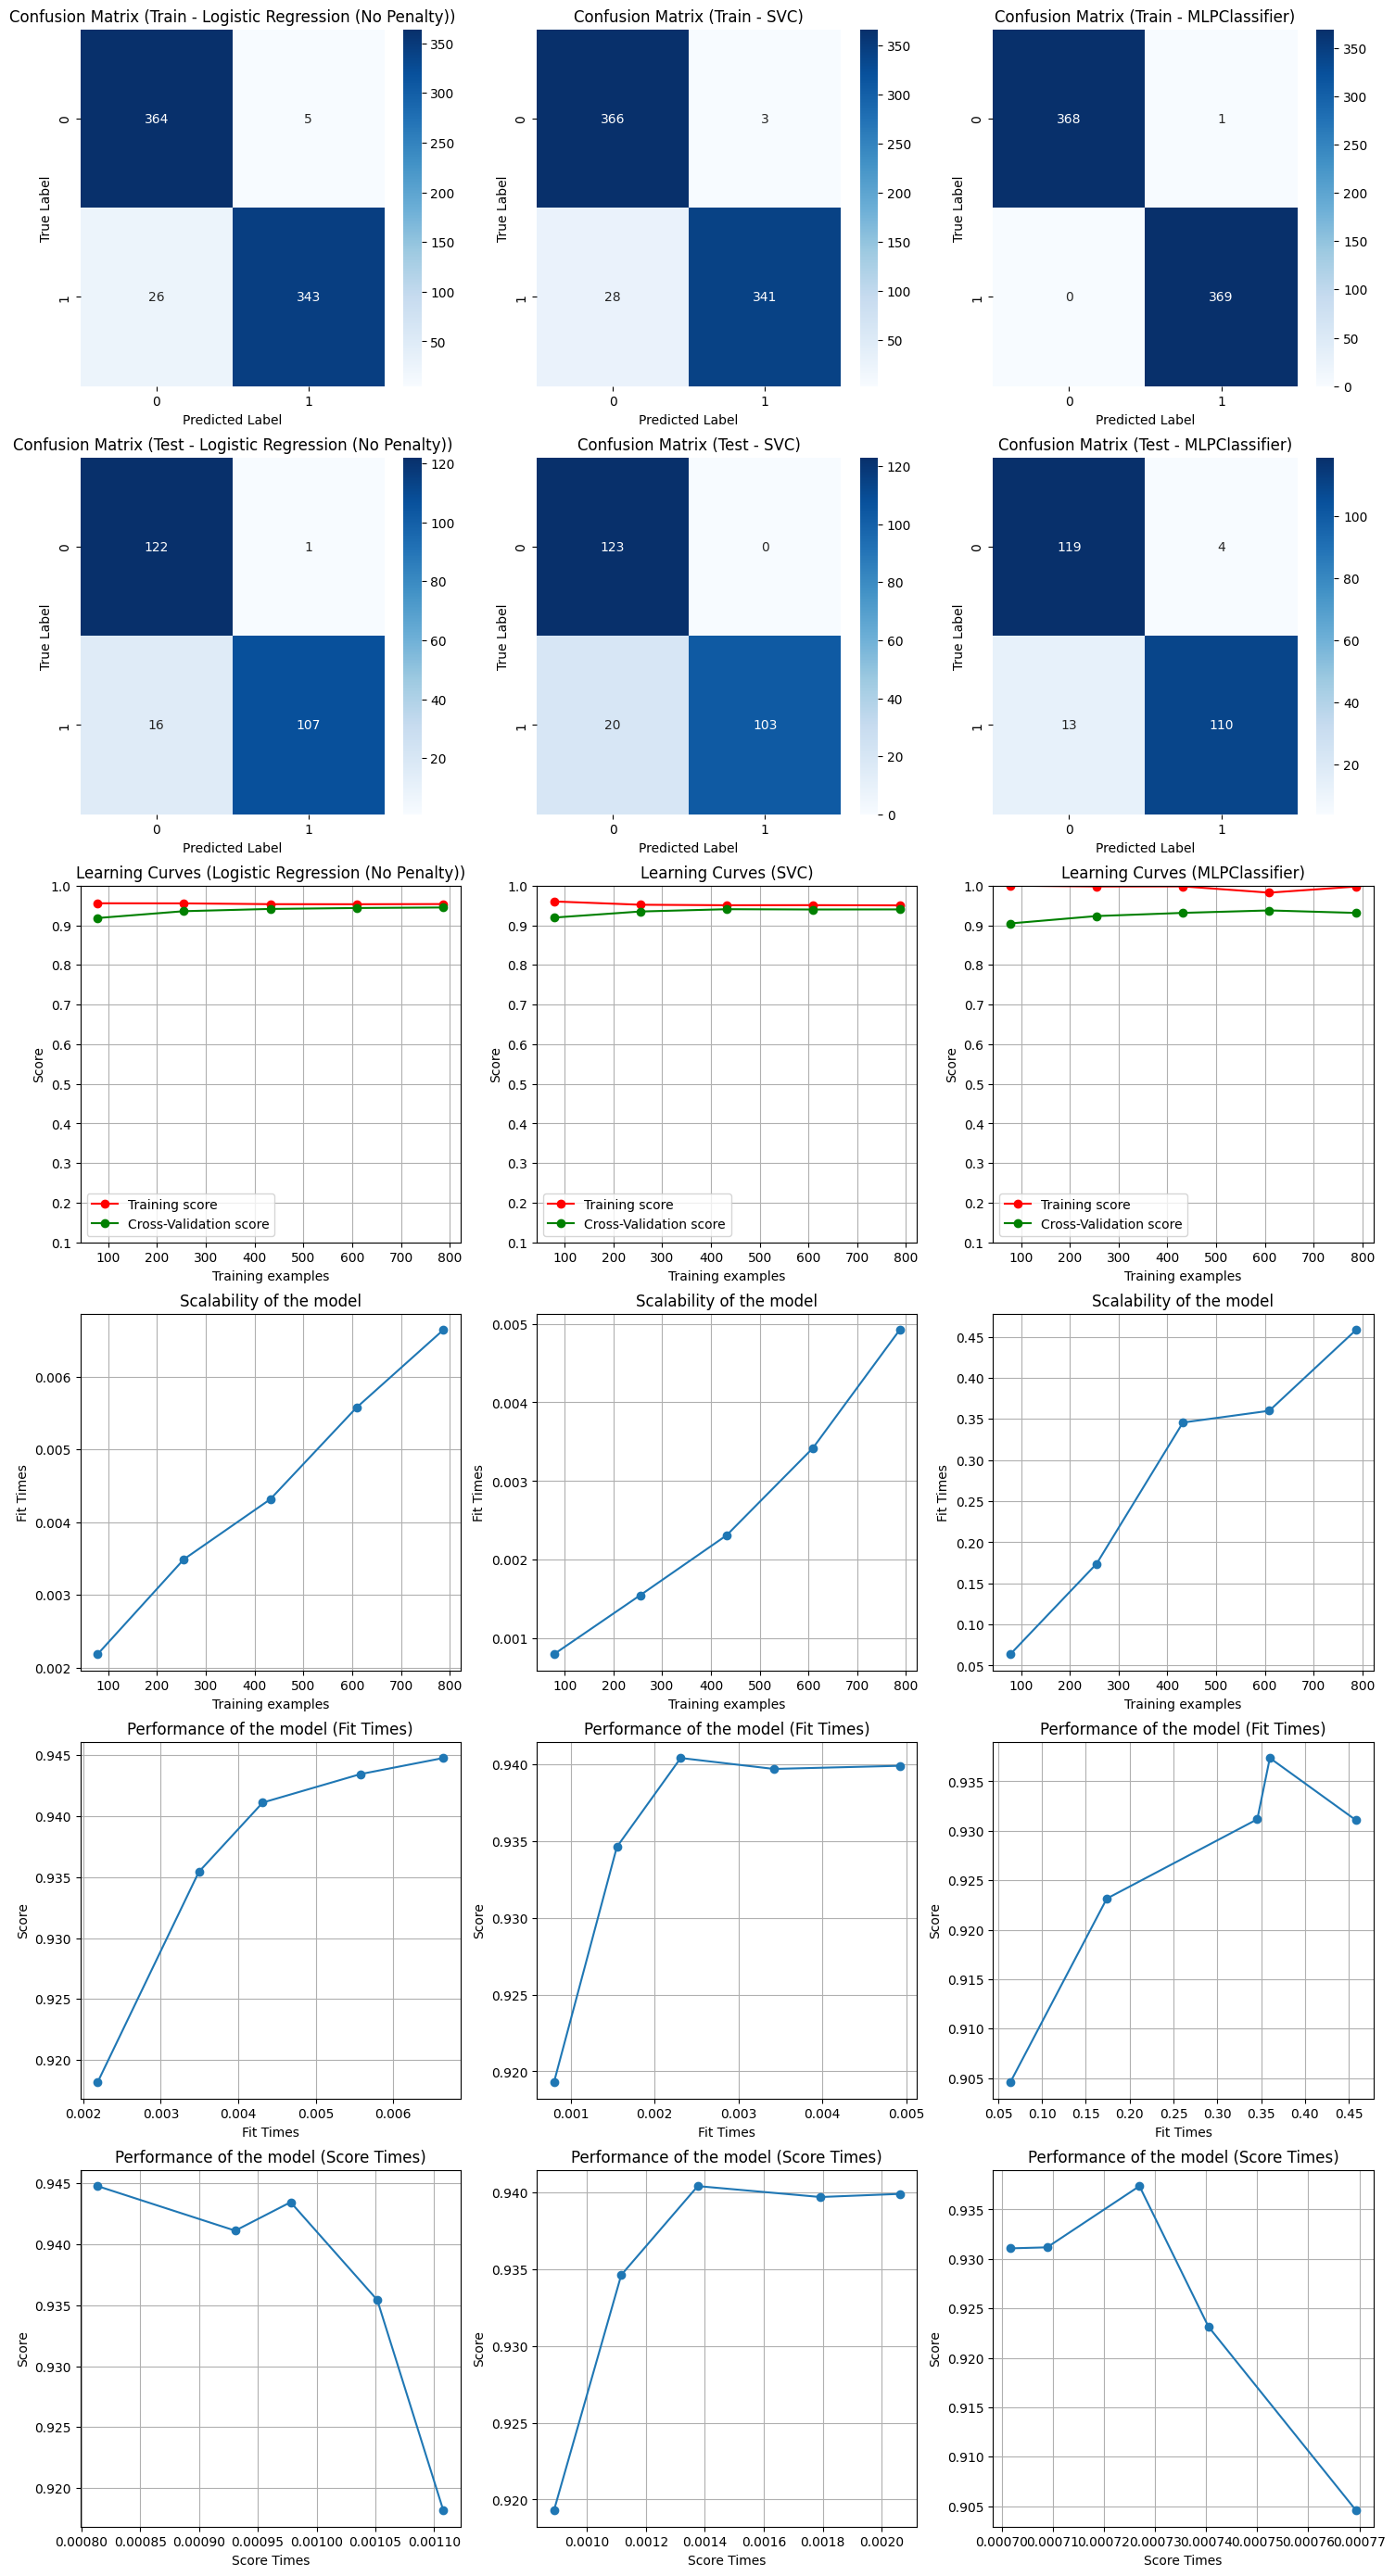

In [31]:
from sklearn.model_selection import cross_validate


compare_algorithms(algorithms, X, Y)

for algorithm in algorithms: 
    kfold_test(X_train, y_train, X_test, y_test, algorithm, 4)

In [32]:
def val_curvve(clf,X,y,name,range_):
    train_scores, test_scores = validation_curve(
        clf,
        X,
        y,
        param_name=name,
        param_range=range_,
        scoring="accuracy",
        n_jobs=5,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve ")
    plt.xlabel(name)
    plt.ylabel("Score")
    plt.plot(range_,train_scores_mean,label="Training score", color="r")
    

    plt.plot(
        param_range, test_scores_mean, label="Cross-validation score", color="navy")
  
    plt.legend(loc="best")
    plt.show()

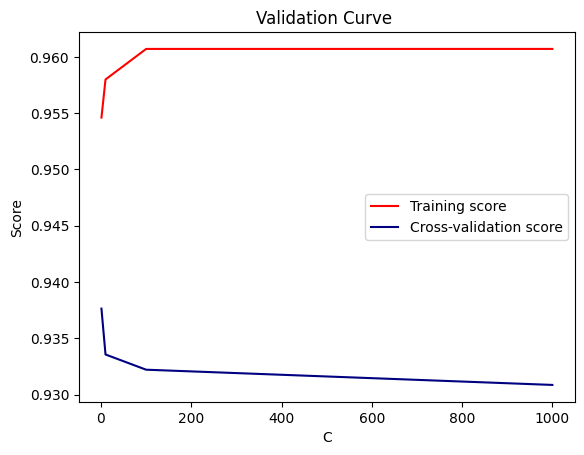

In [36]:
param_range = [1, 10, 100, 1000]
val_curvve(LogisticRegression(),X_train,y_train,"C",param_range)

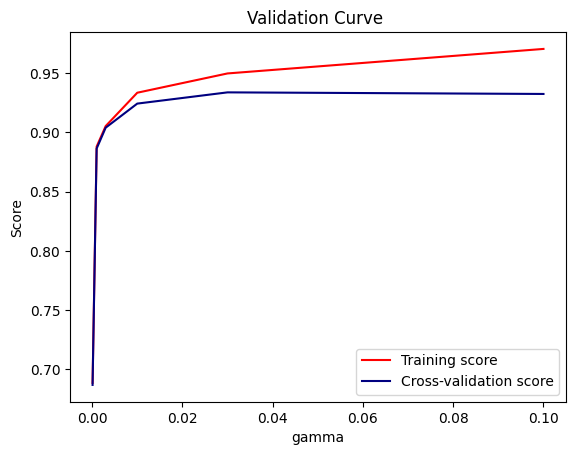

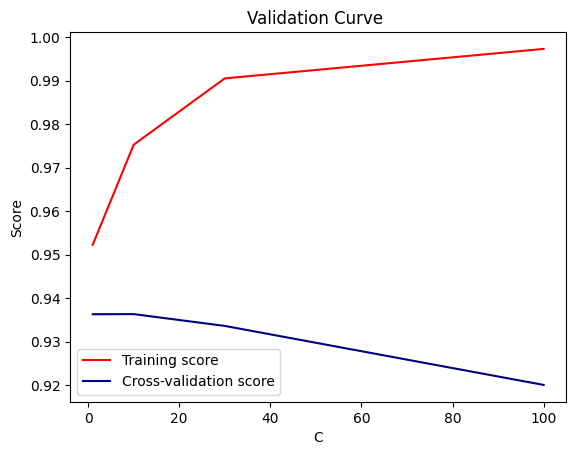

In [34]:
param_range = [0.0001,0.001, 0.003, 0.01, 0.03, 0.1]
val_curvve(SVC(),X_train,y_train,"gamma",param_range)

param_range = [1,10,30,100]
val_curvve(SVC(),X_train,y_train,"C",param_range)

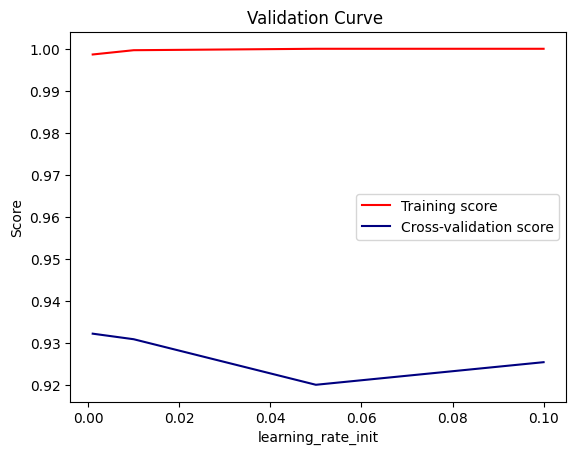

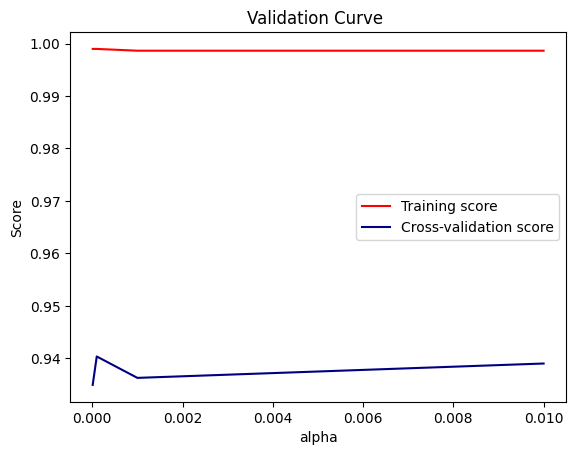

In [37]:
param_range = [0.001, 0.01,0.05,0.1]
val_curvve(MLPClassifier(max_iter=1000),X_train,y_train,"learning_rate_init",param_range)

param_range = [1e-2,1e-3,1e-4,1e-5]
val_curvve(MLPClassifier(max_iter=1000),X_train,y_train,"alpha",param_range)

Logistic Regression (No Penalty)
	F1 score: 0.9867.
	Accuracy score: 0.9768.
	Precision score: 0.0633.
	Recall score: 0.9024.

SVC
	F1 score: 0.9995.
	Accuracy score: 0.9995.
	Precision score: 0.9089.
	Recall score: 0.7907.

MLPClassifier
	F1 score: 0.9995.
	Accuracy score: 0.9995.
	Precision score: 0.9322.
	Recall score: 0.7541.



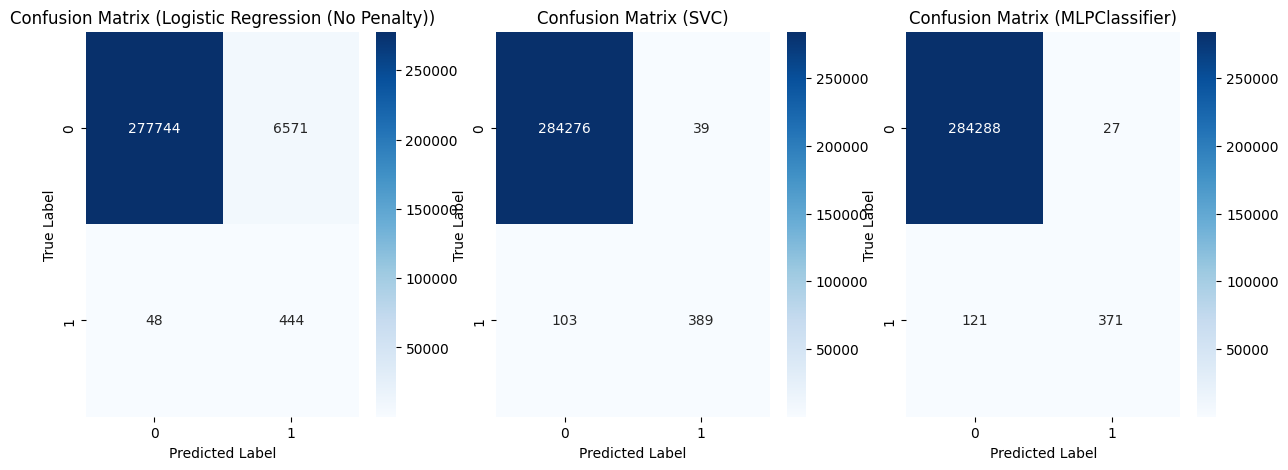

In [49]:
original = pd.read_csv("creditcard.csv")

X_original = original[features]
X_original = StandardScaler().fit(X_original).transform(X_original)
X_original = pd.DataFrame(X_original, columns = features)[best_features]

original = pd.concat([X_original, original[label_column]], axis=1)

y_original = original['Class']

fig, chart = plt.subplots(1, len(algorithms), figsize=(5*len(algorithms), 5))

for i in range(len(algorithms)):
    algorithm = algorithms[i]
    algorithm_name = algorithm.__class__.__name__

    if i == 0:
        algorithm_name = "Logistic Regression (No Penalty)"
    
    print(algorithm_name)

    algorithm.fit(X_original, y_original)

    labels_predicted = algorithm.predict(X_original)
    accuracy_train = sum(y_original == labels_predicted) / float(len(labels_predicted))
    f1_train = f1_score(y_original, labels_predicted, average='weighted')
    print("\tF1 score: {:.4f}.".format(f1_train))
    print("\tAccuracy score: {:.4f}.".format(accuracy_train))

    print("\tPrecision score: {:.4f}.".format(precision_score(y_original, labels_predicted)))
    print("\tRecall score: {:.4f}.\n".format(recall_score(y_original, labels_predicted)))

    confusion_matrix_train = confusion_matrix(y_original, labels_predicted)
    sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues", ax=chart[i])
    chart[i].set_xlabel("Predicted Label")
    chart[i].set_ylabel("True Label")
    chart[i].set_title("Confusion Matrix ({})".format(algorithm_name))